## Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Dictionary

### Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

## Content

- <a href = #link1>Data Structure and Summary</a>

- <a href = #link2>Data Pre-processing</a>

- <a href = #link3>Univariate Analysis</a>

- <a href = #link4>Bivariate Analysis</a>

- <a href = #link5>Data Pre-processing</a>

- <a href = #link6>Model Building and Evaluation</a>

    - <a href = #link7>Decision Tree</a>

    - <a href = #link8>Random Forest</a>

    - <a href = #link9>Bagging Classifier</a>

    - <a href = #link10>Adaboost Classifier</a>

    - <a href = #link11>Gradient Boosting Classifier</a>

    - <a href = #link12>Xgboost Classifier</a>

    - <a href = #link13>Stacking Classifier</a>

- <a href = #link14>Comparison of model performance</a>

- <a href = #link15>Conclusion</a>

- <a href = #link16>Recommendation</a>

## <a id = "link1"></a> Data Structure and Summary

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# load file from cloud to colab, run XGBoost with GPU configuration

# from google.colab import drive
# drive.mount('/content/drive')

# tourism = pd.read_excel(io = '/content/drive/My Drive/Tourism.xlsx', sheet_name = 'Tourism')   # read the excel file

In [3]:
# load file from local host, run XGBoost with CPU configuration

tourism = pd.read_excel(io = 'Tourism.xlsx', sheet_name = 'Tourism')   # read the excel file

In [4]:
df = tourism.copy()   # copy the data to df

In [5]:
df.head()   # display first 5 rows

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [6]:
df.tail()   # display last 5 rows

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [7]:
df.shape

(4888, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

**Observation:**
- The data set has 4888 rows and 20 columns, with both numerical columns and object columns.
- Missing values exist at serveral columns.

In [9]:
df.isnull().sum().sort_values(ascending = False)   # check number of missing values

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [11]:
df.describe(include = ['object']).T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


**Observation:**
- Out of 20 columns, 8 columns have missing values. But the number of missing values is acceptable compared to the total number of observations. We can try to impute them.
- CustomerID seems to be just an index that doesn't help with our prediction. Should drop it before model building.
- Remarkable difference exists between the 3rd quantile and the maximum in DurationOfPitch, indicating the presence of outliers. So does MonthlyIncome.
- Gender has 3 unique values, which needs further investigation.
- Multiple columns should be converted to categorical variables.

## <a id = "link2"></a> Data Pre-processing

### Drop CustomerID

In [12]:
df.drop('CustomerID', axis = 1, inplace = True)

### Convert to category

In [13]:
category_cols = df.select_dtypes(include = 'object').columns.to_list() + ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar']

# convert object and some of numerical variables into categorical variables
for col in category_cols:
    df[col] = df[col].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

### Check unique values in categorical columns

In [15]:
for col in category_cols:
    print(df[col].value_counts(ascending = False))
    print('')

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

0    3968
1     920
Name: ProdTaken, dtype: int64

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

3.0    2993
5.0     956
4.0     913
Name: PreferredPropertyStar, dtype: int64

0    3466
1    1422
Name: Passport, dtype: int64

3    1478
5     970
1     942
4     912
2     586
Name: PitchSatisfactionScore, d

**Observation:**
- Should combine "Female" and "Fe Male" at column Gender.
- Should combine "Single" and "Unmarried" at column MaritalStatus.

### Fix Gender and MaritalStatus Column

In [16]:
df.Gender.replace('Fe Male', 'Female', inplace = True)
df.MaritalStatus.replace('Unmarried', 'Single', inplace = True)

### Data Summary

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4662.0,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4822.0,1.187267,0.857861,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4655.0,23619.853491,5380.698361,1000.0,20346.0,22347.0,25571.0,98678.0


In [18]:
df.describe(include = 'category').T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4862.0,3.0,3.0,2993.0
MaritalStatus,4888,3,Married,2340
Passport,4888,2,0,3466
PitchSatisfactionScore,4888,5,3,1478


## EDA

### <a id = "link3"></a> Univariate Analysis

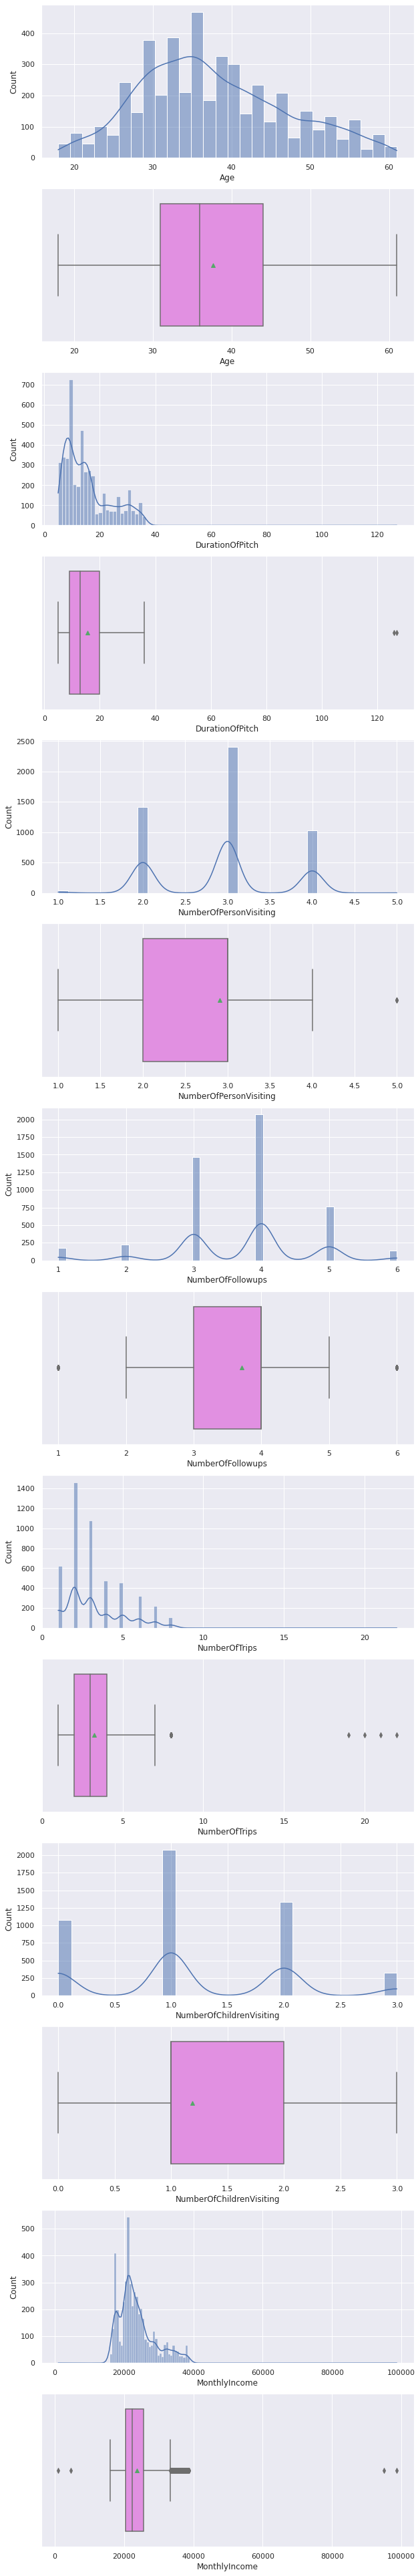

In [19]:
plt.figure(figsize = (10, 70))
for i, col in enumerate(df.select_dtypes(include = 'number').columns.to_list()):
    plt.subplot(14, 1, 2 * i + 1)
    sns.histplot(df[col], kde = True)     # histogram
    plt.subplot(14, 1, 2 * i + 2)
    sns.boxplot(x = df[col], color = 'violet', showmeans = True)   # box plot

**Observation:**
- Age is approximately normal distribution, with mean of 37.6 and median of 36.
- DurationOfPitch is right-skewed, with a few outliers beyond 120.
- Most customers plan to take the trip with 2- 4 people.
- Usually, salesperson need to follow up with customers after the sales pitch 3 - 4 times.
- Although most customers take less than 4 trips per year, some outliers take more than 20 trips a year.
- MonthlyIncome mainly ranges from 15000 to 40000, with outliers on both ends.

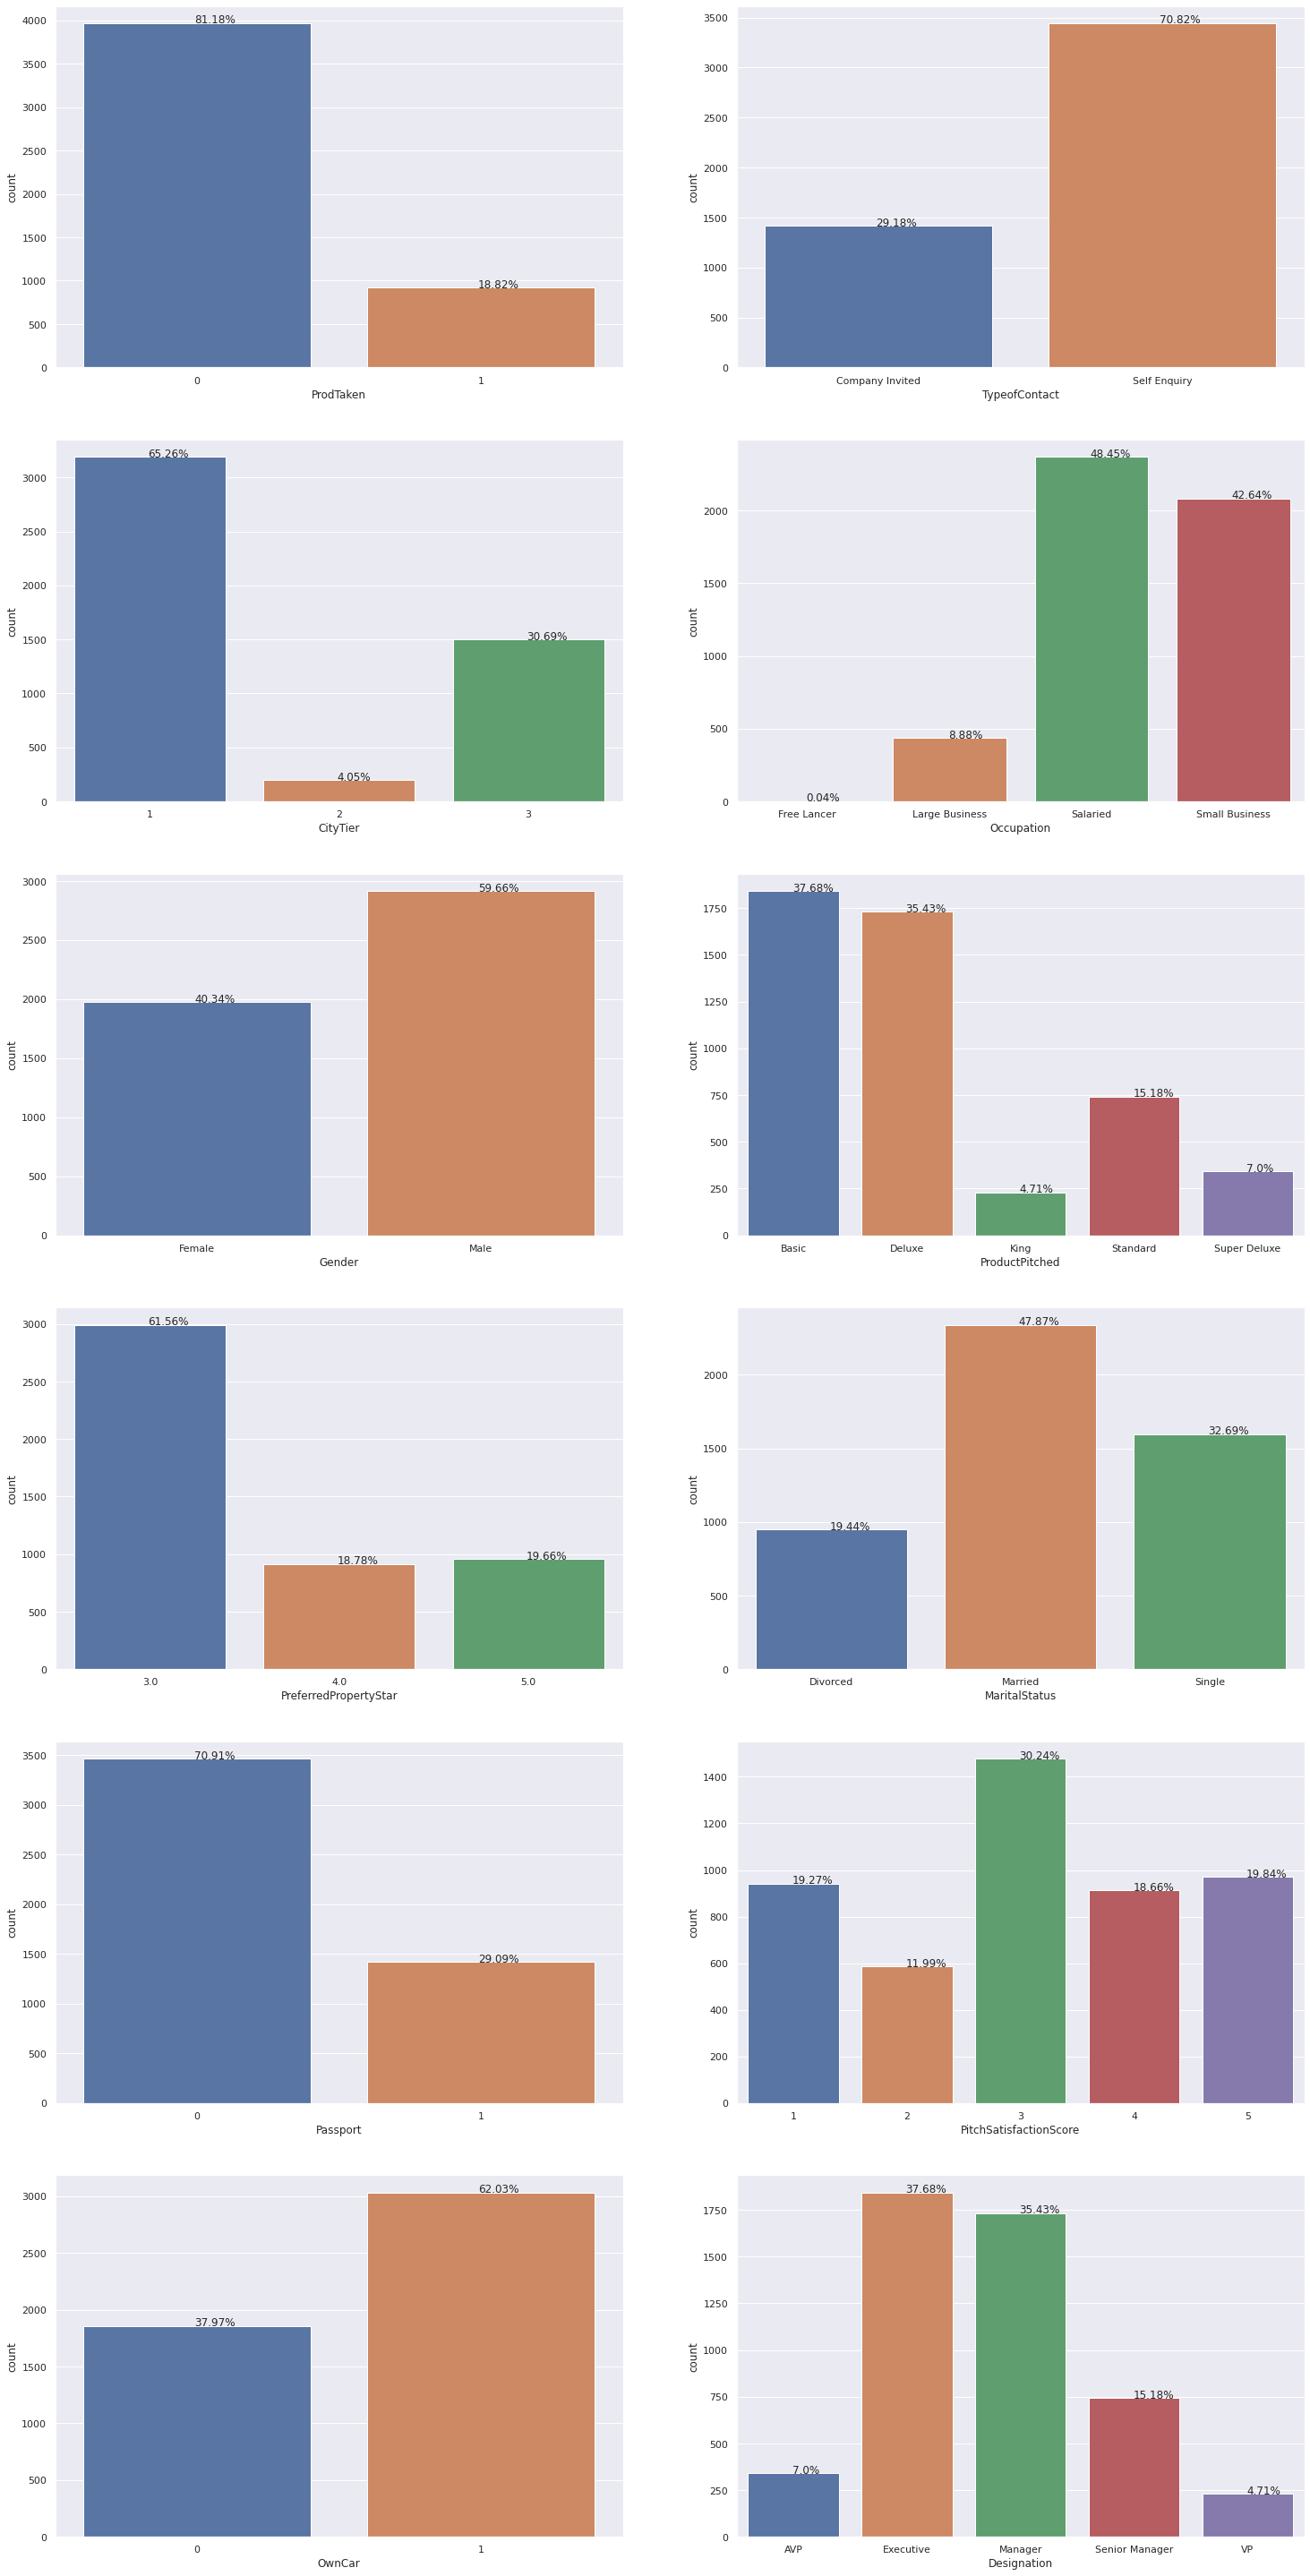

In [20]:
plt.figure(figsize = (25, 52))
for i, col in enumerate(df.select_dtypes(include = 'category').columns.to_list()):
    plt.subplot(6, 2, i + 1)
    ax = sns.countplot(x = col, data = df)   # count plot
    total = df[col].notnull().sum()
    for p in ax.patches:
        percent = round(100 * p.get_height() / total, 2)
        x = p.get_x() + p.get_width() / 2 - 0.01
        y = p.get_y() + p.get_height() + 0.01
        ax.annotate(str(percent) + '%', (x, y), fontsize = 12)

**Observation:**
- The class lables are imbalanced. About 81% of the customers didn't buy the package and only 19% accepted it.
- About 70% of the customers was contacted by Self Inquiry.
- Most customers came from Tier 1 cities, followed by Tier 3 cities.
- Most customers are Salaried or engaged in small business, with the designation of manager or executive.
- 60% of the customers are male.
- Among five packages, Basic and Deluxe are pitched more than the other three.
- Most customers prefer hotel property with rating of 3, own cars and don't have passport.
- The most common category of our cusotmers' marital status is married, followed by single.
- Most customers scored their sales pitch experience for at least 3, that is medium or satisfied.

### <a id = "link4"></a> Bivariate Analysis

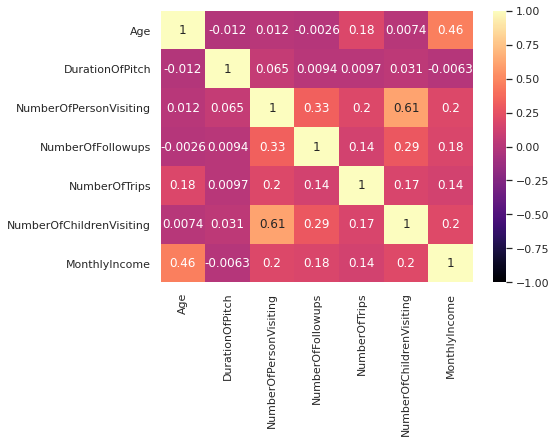

In [21]:
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'magma');

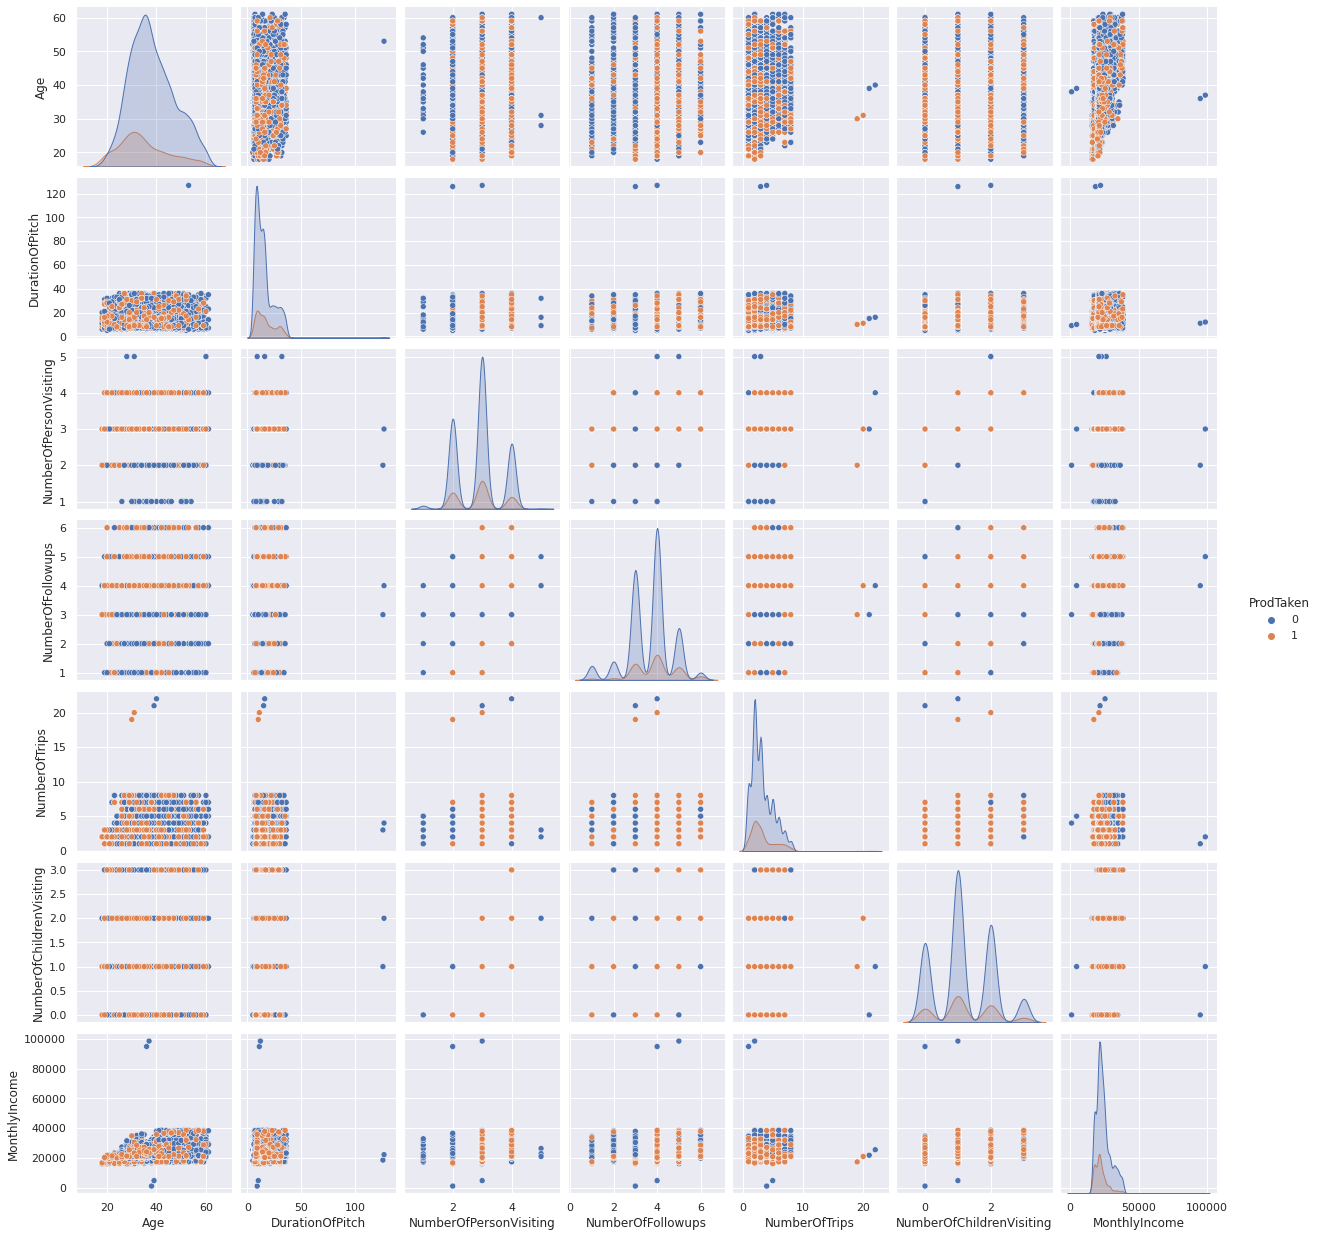

In [22]:
sns.pairplot(data = df, hue = 'ProdTaken');

**Observation:**
- Age and MonthlyIncome have moderate positive correlation.
- NumberOfPersonVisiting and NumberOfChildrenVisiting have moderate positive correlation.

In [23]:
def stacked_bar(index, col): 
    """
    This function is to show the stacked bar plot for the crosstab between df[index] and df[col].
    
    Input:
    index: list of column names.
    col: column name.
    
    Return:
    None.
    """
    pd.crosstab(index = [df[i] for i in index], columns = df[col], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (len(index) * 8,4));
    plt.xticks(rotation = 45);
    plt.legend(loc = 'lower right');

In [24]:
def boxplot_with_and_without_outliers(cat_col, num_col, hue = None):
    """
    This function is to show the box plot with/ without outliers for df[cat_col] and df[num_col], in terms of df[hue].
    """
    plt.figure(figsize = (20,5));
    plt.subplot(1, 2, 1);
    sns.boxplot(x = cat_col, y = num_col, hue = hue, data = df);
    plt.title('With outliers');
    plt.subplot(1, 2, 2);
    sns.boxplot(x = cat_col, y = num_col, hue = hue, data = df, showfliers = False);
    plt.title('Without outliers');

In [25]:
def buyer_distribution(cat_col):
    """
    This function is to show the distribution of buyers of travel package in terms of indepedent variables cat_col.
    
    Input:
    cat_col: list of column names.
    
    Return:
    None.
    """
    ctab = pd.crosstab(index = [df[i] for i in cat_col], columns = df.loc[df["ProdTaken"] == 1, 
                                                                          "ProdTaken"], normalize = 'all').sort_values(by = 1, ascending = False)
    display(ctab)
    ctab.plot(kind = 'bar');

### ProdTaken vs Age

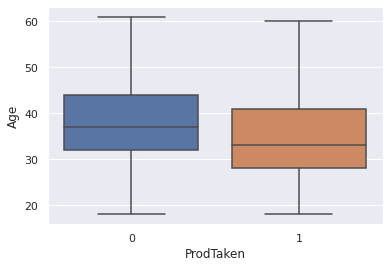

In [26]:
sns.boxplot(x = 'ProdTaken', y = 'Age', data = df);

**Observation:** Younger customers tend to buy the package. 

### ProdTaken vs TypeofContact

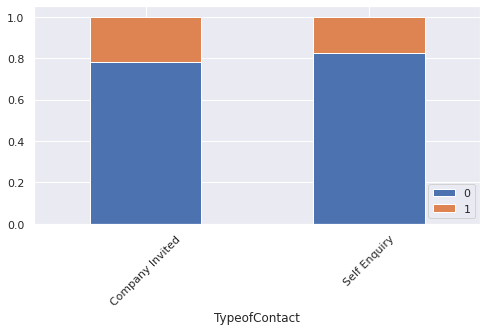

In [27]:
stacked_bar(['TypeofContact'], 'ProdTaken')

**Observation:** Type of contact doesn't play an important role in package acceptance.

### ProdTaken vs CityTier

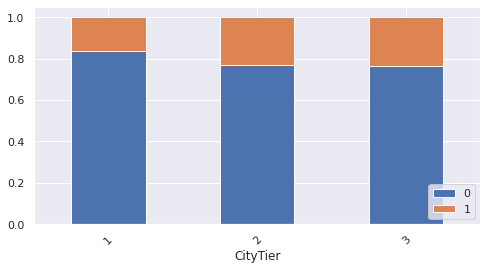

In [28]:
stacked_bar(['CityTier'], 'ProdTaken')

**Observation:** Customers from Tier 2 and Tier 3 cities are more likely to accept the package.

### ProdTaken vs Occupation

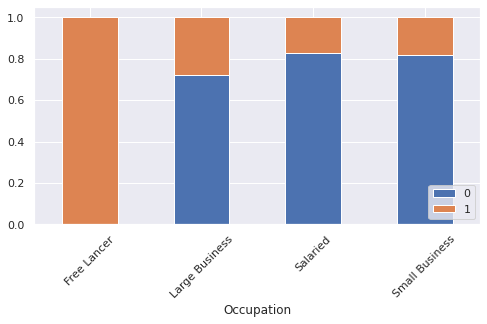

In [29]:
stacked_bar(['Occupation'], 'ProdTaken')

ProdTaken,1
Occupation,
Salaried,0.450000
Small Business,0.417391
Large Business,0.130435
Free Lancer,0.002174


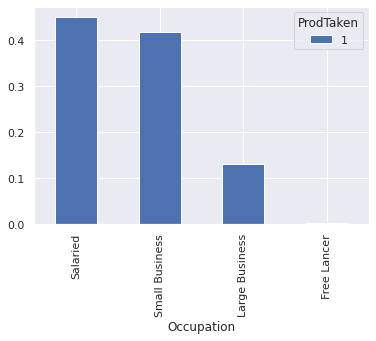

In [30]:
buyer_distribution(["Occupation"])

**Observation:** Customers that are large business owners are more likely to buy packages. Though free lancers show high interest to our products, they only account for a negligible proportion of total buyers. Salaried employees and small business owners are the two major sectors of buyers.

### ProdTaken vs Designation

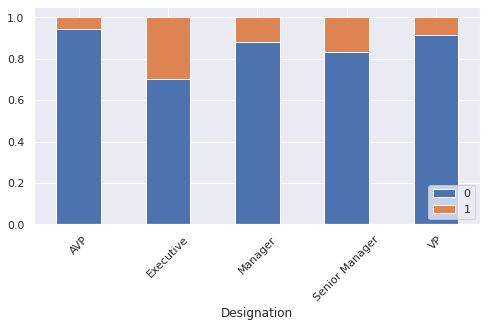

In [31]:
stacked_bar(['Designation'], 'ProdTaken')

**Observation:** Customers with the title of executive are most likely to buy the package, followed by senior manager.

### ProdTaken vs Gender

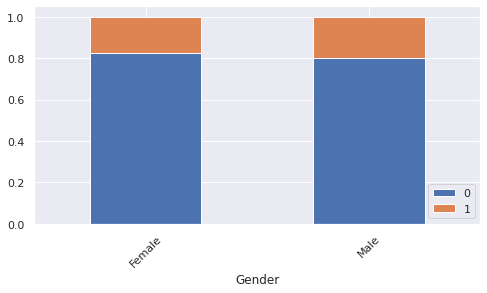

In [32]:
stacked_bar(['Gender'], 'ProdTaken')

ProdTaken,1
Gender,
Male,0.628261
Female,0.371739


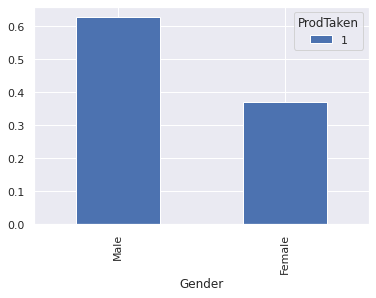

In [33]:
buyer_distribution(["Gender"])

**Observation:** Gender makes little difference in purchase decision. Male accounts for more than 60% of total buyers.

### ProdTaken vs NumberOfPersonVisiting

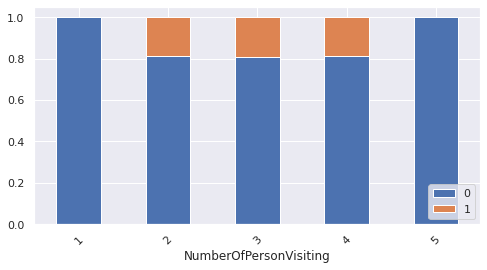

In [34]:
stacked_bar(['NumberOfPersonVisiting'], 'ProdTaken')

ProdTaken,1
NumberOfPersonVisiting,
3,0.500000
2,0.290217
4,0.209783


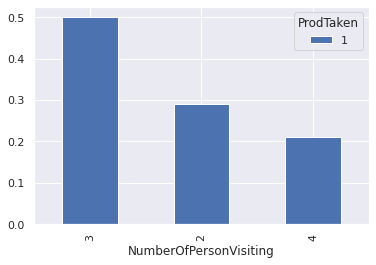

In [35]:
buyer_distribution(["NumberOfPersonVisiting"])

**Observation:** Customers with 2 - 4 people to take the trip are more likely to buy the package. Half of buyers plan to go with 3 other people.

### ProdTaken vs NumberOfChildrenVisiting

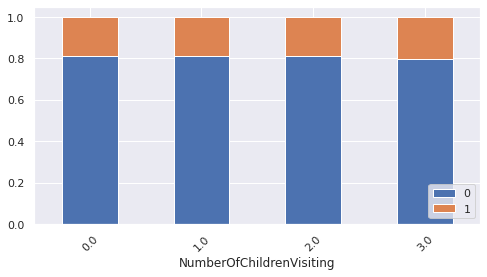

In [36]:
stacked_bar(['NumberOfChildrenVisiting'], 'ProdTaken')

ProdTaken,1
NumberOfChildrenVisiting,
1.0,0.429354
2.0,0.277108
0.0,0.221249
3.0,0.072289


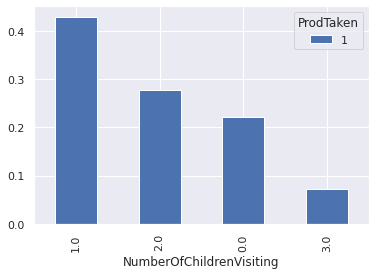

In [37]:
buyer_distribution(["NumberOfChildrenVisiting"])

**Observation:** The number of children with age less than 5 planning to take the trip with the customer doesn't affect the purchase decision. About 43% buyers go with 1 child.

### ProdTaken vs PreferredPropertyStar

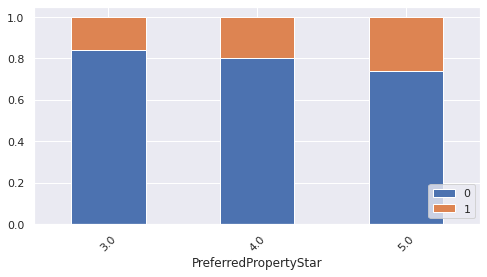

In [38]:
stacked_bar(['PreferredPropertyStar'], 'ProdTaken')

ProdTaken,1
PreferredPropertyStar,
3.0,0.527352
5.0,0.273523
4.0,0.199125


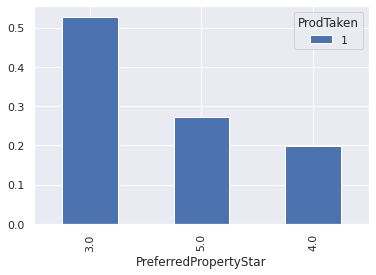

In [39]:
buyer_distribution(["PreferredPropertyStar"])

**Observation:** Customers who prefer hotels with higher ratings are more likely to become buyers. More than 50% of package buyers prefer 3-star hotels.

### ProdTaken vs MaritalStatus

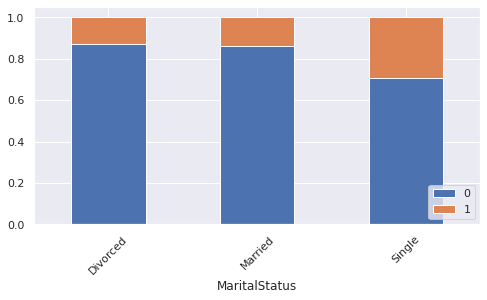

In [40]:
stacked_bar(['MaritalStatus'], 'ProdTaken')

ProdTaken,1
MaritalStatus,
Single,0.510870
Married,0.354348
Divorced,0.134783


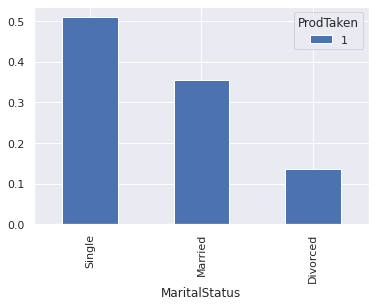

In [41]:
buyer_distribution(["MaritalStatus"])

**Observation:** Singles are more likely to become buyers. They are also the major buyers, taking more than 50% of all buyers.

### ProdTaken vs NumberOfTrips

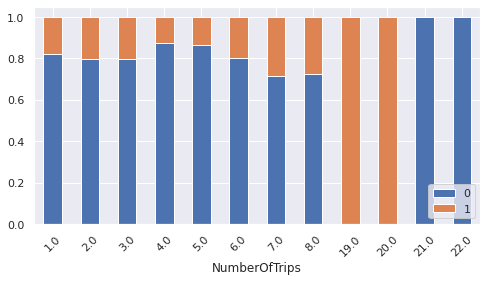

In [42]:
stacked_bar(['NumberOfTrips'], 'ProdTaken')

**Observation:** When NumberOfTrips is less than 9, no pattern presents. Let's take a look at the records of NumberOfTrips >= 19: 

In [43]:
df[df.NumberOfTrips >= 19]

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Single,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Single,22.0,0,2,1,1.0,Manager,25460.0


**Observation:**  It turns out that the sample size of NumberOfTrips >= 19 is very small. No definite conclusion could be drawn from such few samples. 

### ProdTaken vs Passport

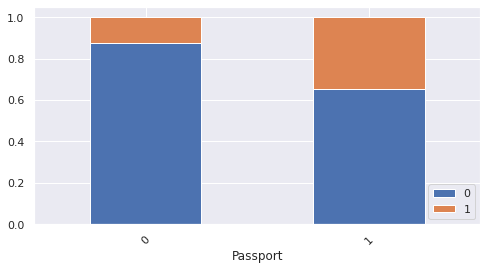

In [44]:
stacked_bar(['Passport'], 'ProdTaken')

**Observation:** People with passport are more likely to buy travel package.

### ProdTaken vs OwnCar

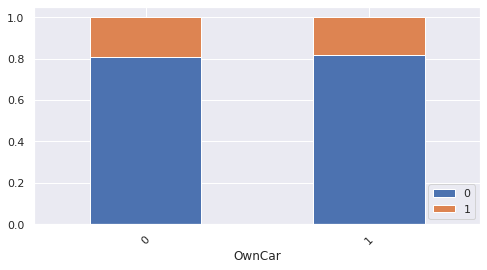

In [45]:
stacked_bar(['OwnCar'], 'ProdTaken')

**Observation:** Whether owning a car is not a major factor in buying travel package.

### ProdTaken vs MonthlyIncome

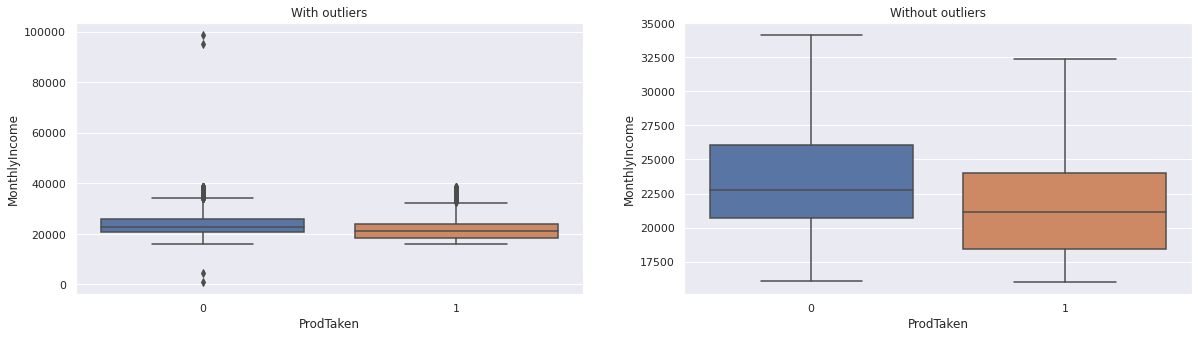

In [46]:
boxplot_with_and_without_outliers('ProdTaken', 'MonthlyIncome')

**Observation:** Customers with lower monthly income tend to buy travel package.

### ProdTaken vs PitchSatisfactionScore

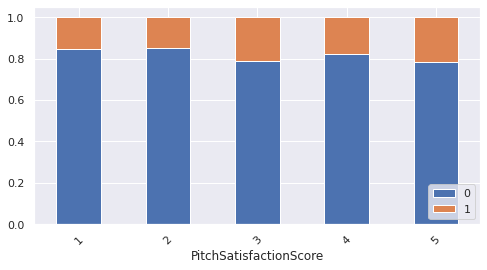

In [47]:
stacked_bar(['PitchSatisfactionScore'], 'ProdTaken')

**Observation:** In general, customers who are more satisfied with the pitch tend to buy travel package.

### ProdTaken vs ProductPitched

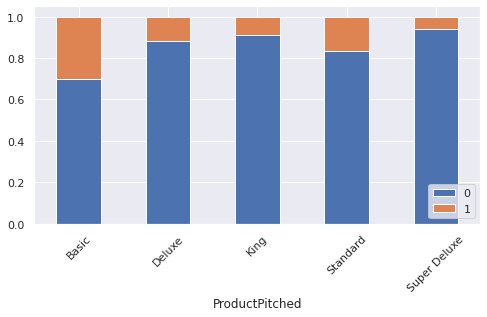

In [48]:
stacked_bar(['ProductPitched'], 'ProdTaken')

ProdTaken,1
ProductPitched,
Basic,0.600000
Deluxe,0.221739
Standard,0.134783
King,0.021739
Super Deluxe,0.021739


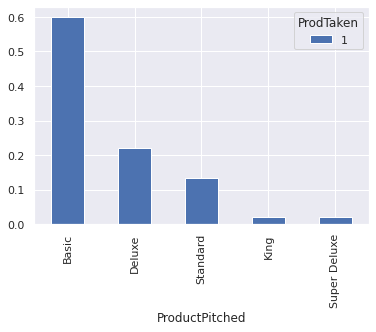

In [49]:
buyer_distribution(["ProductPitched"])

**Observation:** Customers who are pitched with Basic are most likely to buy it, followed by Standard. Basic buyers account for 60% of total buyers.

### ProdTaken vs NumberOfFollowups

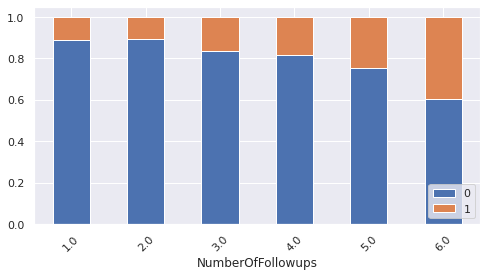

In [50]:
stacked_bar(['NumberOfFollowups'], 'ProdTaken')

**Observation:** The more follow-ups salesperson conducted after the sales pitch, the more likely a customer will buy it.

### ProdTaken vs DurationOfPitch

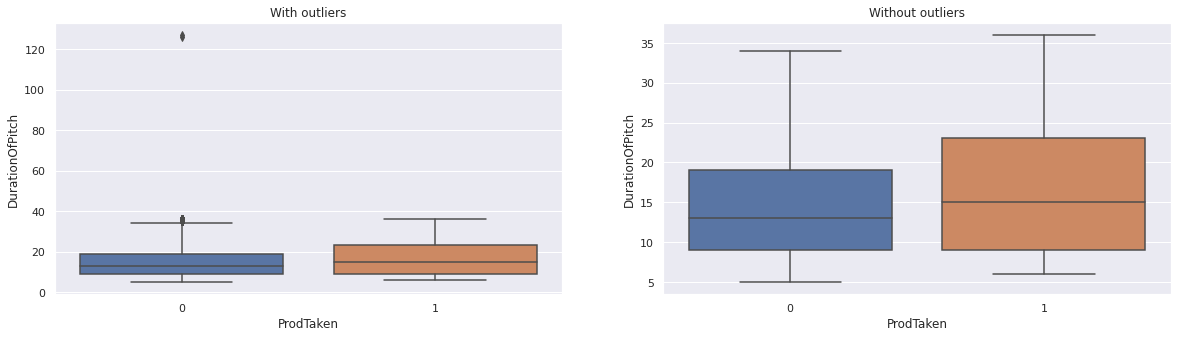

In [51]:
boxplot_with_and_without_outliers('ProdTaken', 'DurationOfPitch')

**Observation:** Customers who bought the package tend to undergo a longer sales pitch.

### Age vs NumberOfTrips

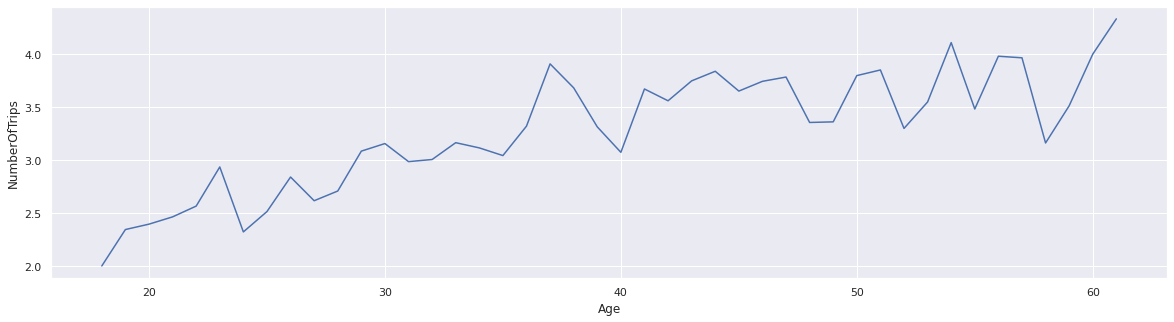

In [52]:
plt.figure(figsize = (20,5));
sns.lineplot(x = 'Age', y =  'NumberOfTrips', data = df, ci = None);

**Observation:** Older people are more active in taking trips.

### ProdTaken vs Age vs NumberOfTrips

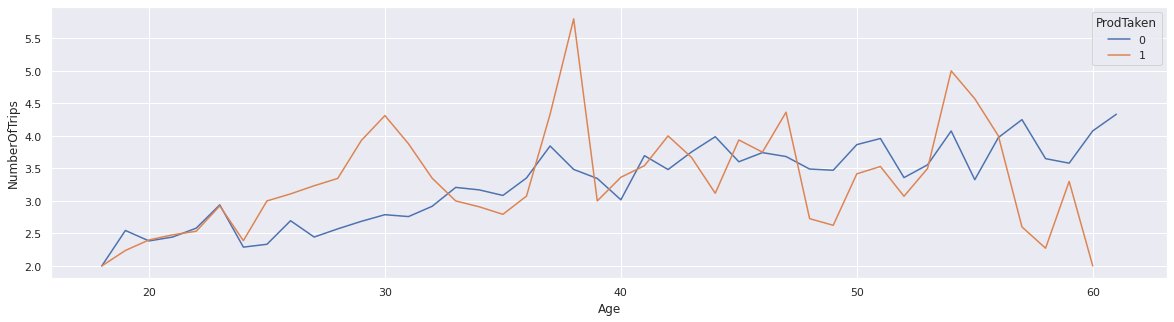

In [53]:
plt.figure(figsize = (20,5));
sns.lineplot(x = 'Age', y =  'NumberOfTrips', hue = 'ProdTaken', data = df, ci = None);

**Observation:** 
- For customers who're less than 40 years old, those who travel more frequently are more likely to buy travel package.
- For customers who're greater than 57 years old, those who travel less frequently are more likely to buy travel package.

### ProdTaken vs Gender vs MonthlyIncome

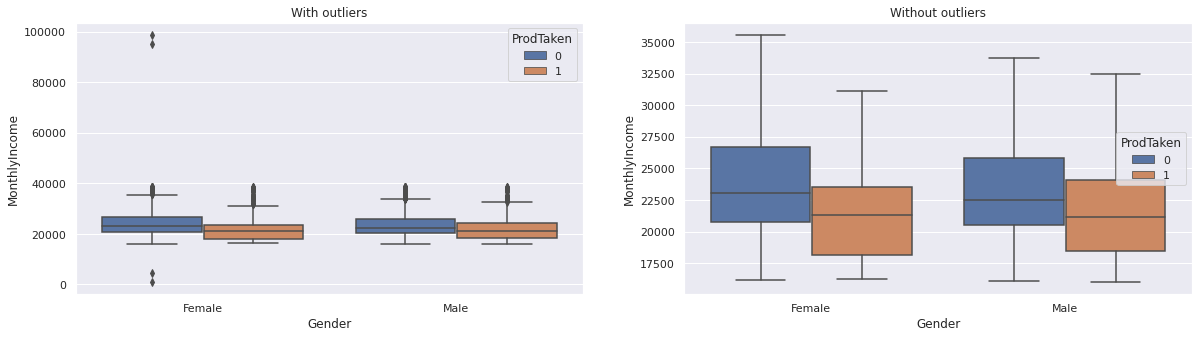

In [54]:
boxplot_with_and_without_outliers('Gender', 'MonthlyIncome', 'ProdTaken')

**Observation:** For both genders, those with lower monthly income tend to buy the travel package.

### Gender vs MonthlyIncome

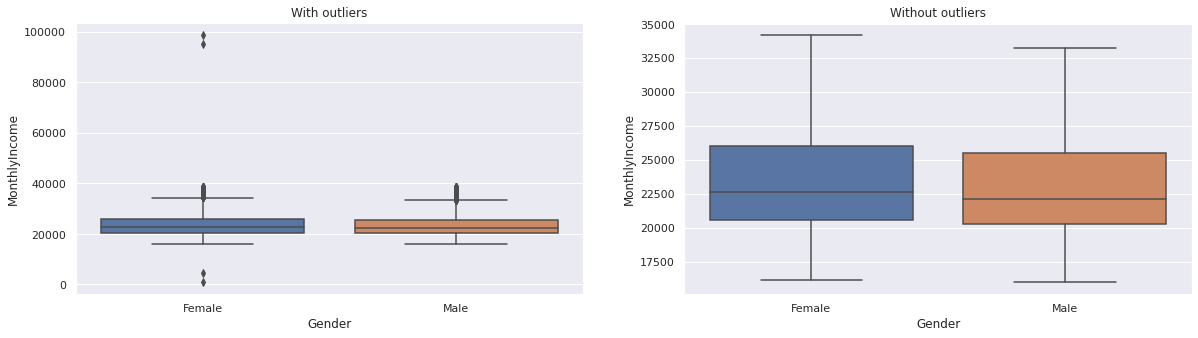

In [55]:
boxplot_with_and_without_outliers('Gender', 'MonthlyIncome')

**Observation:** The monthly income for male is slightly lower than that of female.

### ProdTaken vs Age vs MonthlyIncome

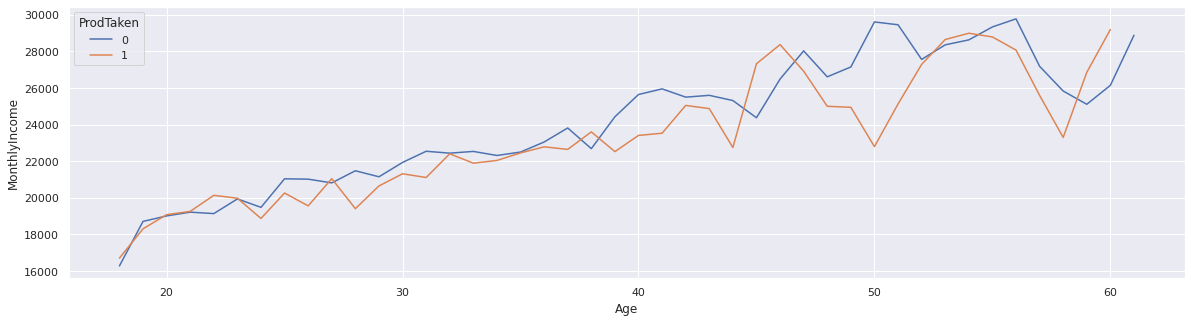

In [56]:
plt.figure(figsize = (20,5));
sns.lineplot(x = 'Age', y = 'MonthlyIncome', hue = 'ProdTaken', data = df, ci = None);

**Observation:** Monthly income increases with age. Those who don't have stable income tend to buy travel package.

### MaritalStatus vs NumberOfPersonVisiting

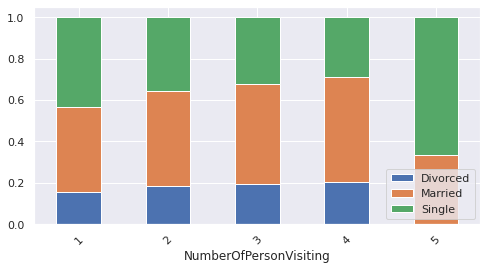

In [57]:
stacked_bar(["NumberOfPersonVisiting"], "MaritalStatus")

**Observation:** When the number of traveling partners is greater than 4, the customer tend to be single or married.

### PreferredPropertyStar vs Age

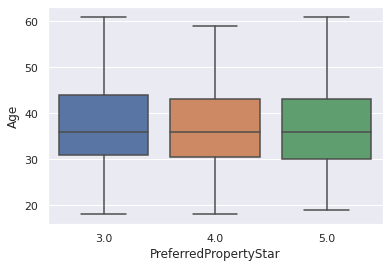

In [58]:
sns.boxplot(x = "PreferredPropertyStar", y = "Age", data = df);

**Observation:** Age and PreferredPropertyStar are not correlated.

### PreferredPropertyStar vs MaritalStatus 

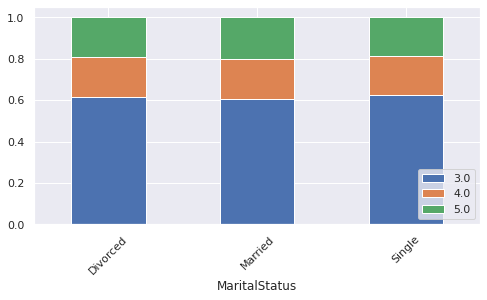

In [59]:
stacked_bar(["MaritalStatus"], "PreferredPropertyStar")

**Observation:** MaritalStatus doesn't affect the distribution of PreferredPropertyStar.

### PreferredPropertyStar vs MonthlyIncome

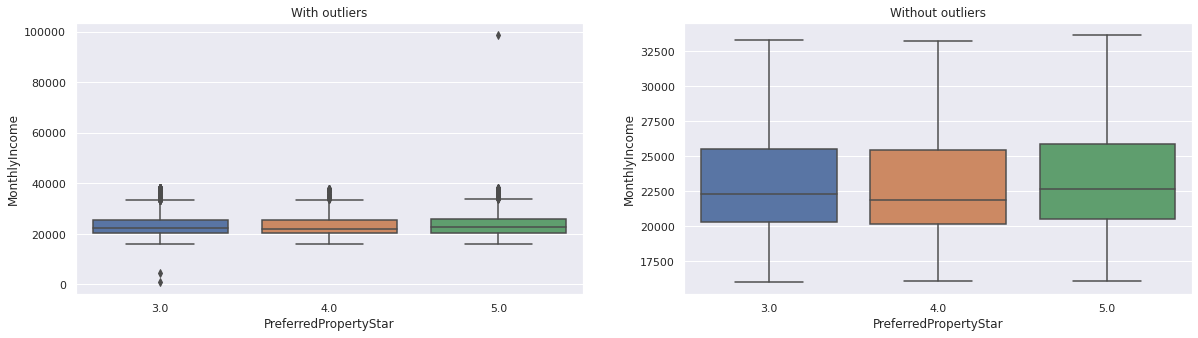

In [60]:
boxplot_with_and_without_outliers("PreferredPropertyStar", "MonthlyIncome")

**Observation:** MonthlyIncome and PreferredPropertyStar are not correlated.

### ProdTaken vs ProductPitched vs Age

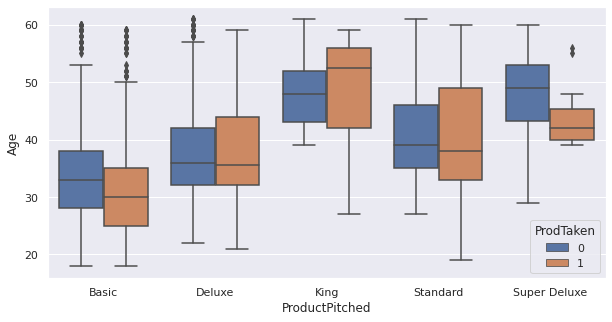

In [61]:
plt.figure(figsize = (10,5));
sns.boxplot(x = 'ProductPitched', y = 'Age', hue = 'ProdTaken', data = df);

**Observation:** 
- Buyers of Basic/ Standard are younger than non-buyers.
- Buyers of King have a wider age range compared to non-buyers.
- Buyers of Super Deluxe fall into a narrow age range.
- Buyers age increase in ascending order: Basic < Deluxe < Standard < Super Deluxe < King.

### ProdTaken vs ProductPitched vs Gender

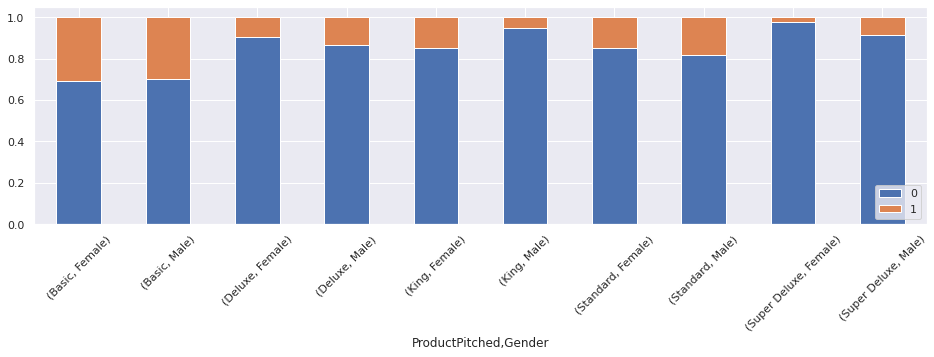

In [62]:
stacked_bar(['ProductPitched', 'Gender'], 'ProdTaken')

**Observation:** Male is more likely to buy compared to female when pitched with Deluxe/ Super Deluxe. Female is more likely to buy compared to male when pitched with King. 

### ProdTaken vs ProductPitched vs MaritalStatus

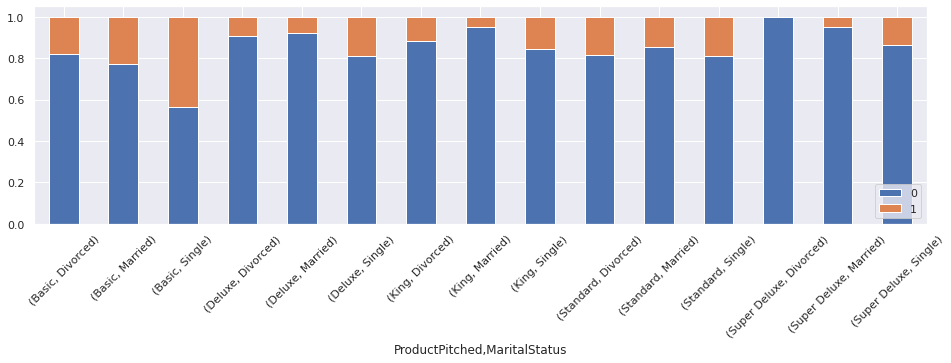

In [63]:
stacked_bar(['ProductPitched', 'MaritalStatus'], 'ProdTaken')

**Observation:** 
- Single customers pitched with Basic/ Deluxe/ Super Deluxe/ King are more likely to buy. 
- Divorced customers don't like Super Deluxe.
- Customers with different marital status show equivalent degree of interest to Standard.

### ProdTaken vs ProductPitched vs CityTier

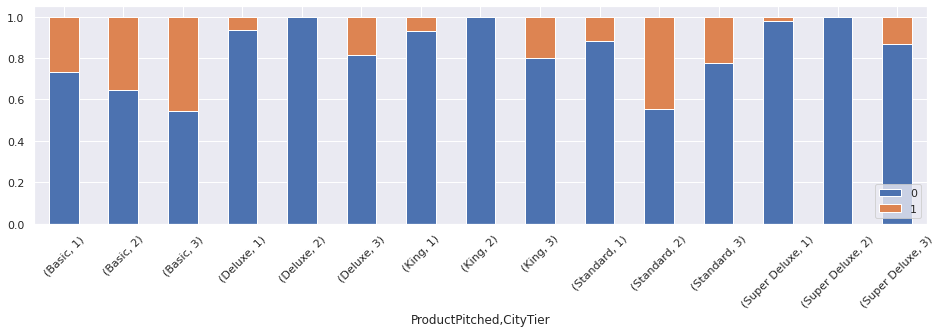

In [64]:
stacked_bar(['ProductPitched', 'CityTier'], 'ProdTaken')

**Observation:** 
- Customers from Tier 3 cities are more likely to buy any travel packages except Standard. 
- Customers from Tier 2 cities are more likely to buy Standard, and not likely to buy Deluxe/ King/ Super Deluxe.

### ProdTaken vs ProductPitched vs MonthlyIncome

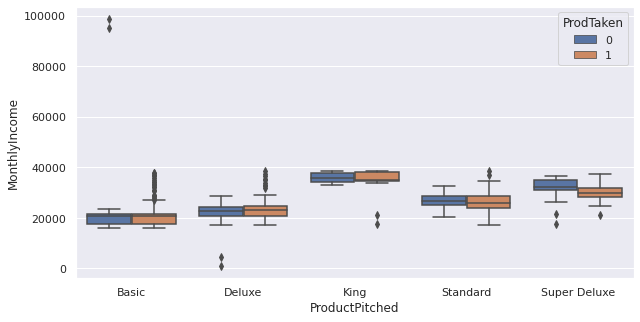

In [65]:
plt.figure(figsize = (10,5));
sns.boxplot(x = 'ProductPitched', y = 'MonthlyIncome', data = df, hue = 'ProdTaken');

**Observation:** The monthly income of buyers of travel packages in ascending order: Basic < Deluxe < Standard < Super Deluxe < King.

### ProdTaken vs ProductPitched vs Occupation

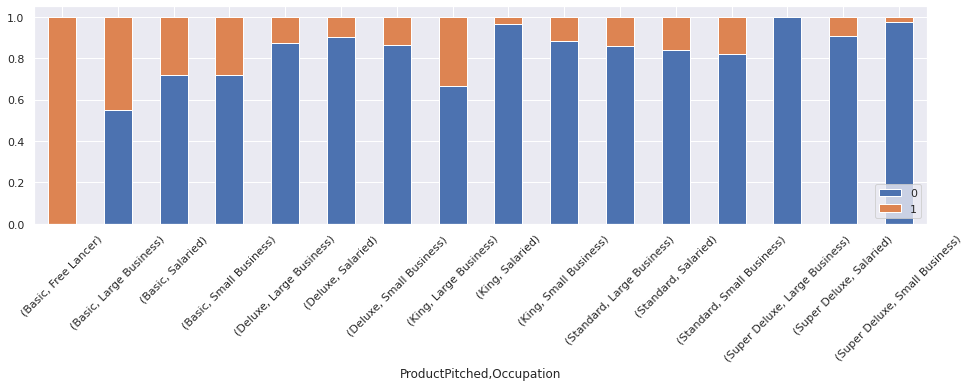

In [66]:
stacked_bar(['ProductPitched', 'Occupation'], 'ProdTaken')

**Observation:** 
- Basic is more popular among free lancers and large business owners.
- King is more popular among large business owners.
- Super Deluxe is more popular among salaried employees and disliked by large business owners.

### ProdTaken vs ProductPitched vs Designation

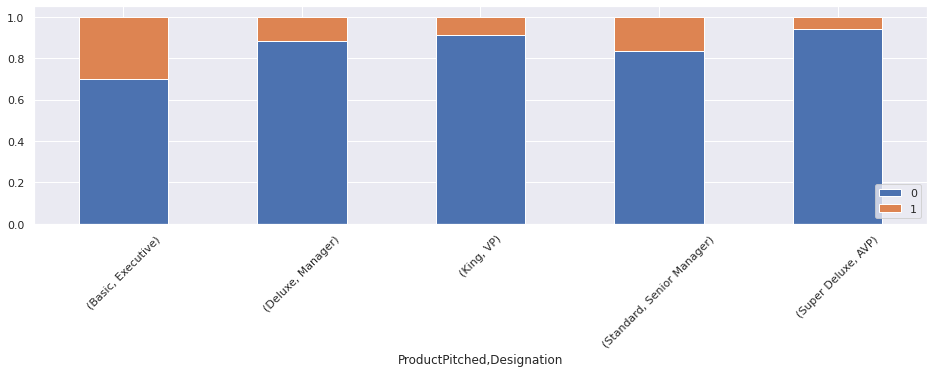

In [67]:
stacked_bar(['ProductPitched', 'Designation'], 'ProdTaken')

**Observation:** 
- Different packages have different target customers:
    - Basic is for executive.
    - Deluxe is for manager.
    - Standard is for senior manager.
    - Super Deluxe is for AVP.
    - King is for VP.

### ProdTaken vs ProductPitched vs Passport

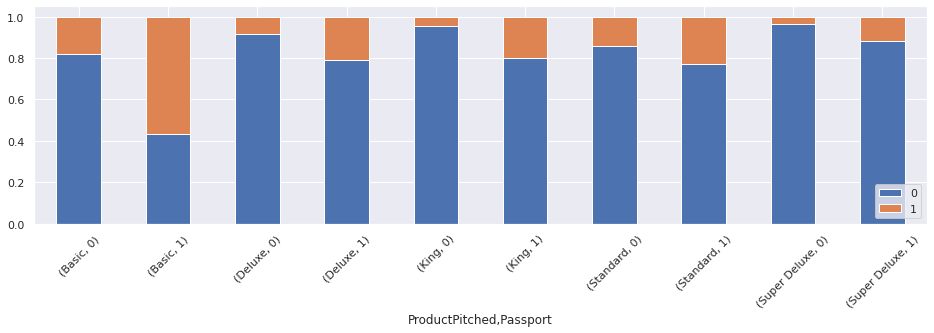

In [68]:
stacked_bar(['ProductPitched', 'Passport'], 'ProdTaken')

**Observation:** Customers pitched with Basic and with passport are far more likely to buy. It may indicate Basic includes international destinations.

### ProdTaken vs ProductPitched vs OwnCar

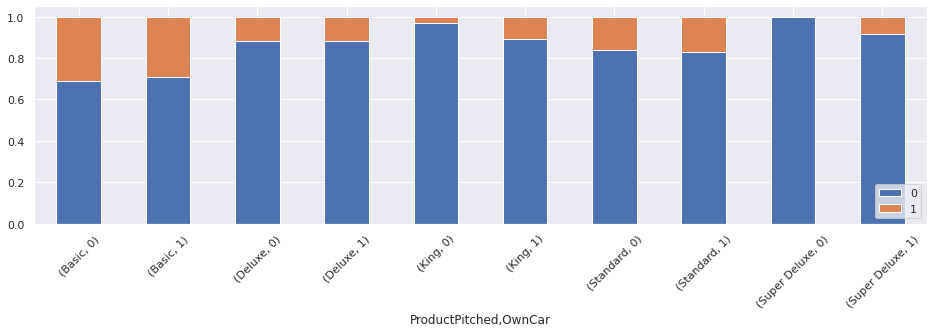

In [69]:
stacked_bar(['ProductPitched', 'OwnCar'], 'ProdTaken')

**Observation:** Customers who are car owners are more likely to buy King or Super Deluxe.

### ProdTaken vs ProductPitched vs PreferredPropertyStar

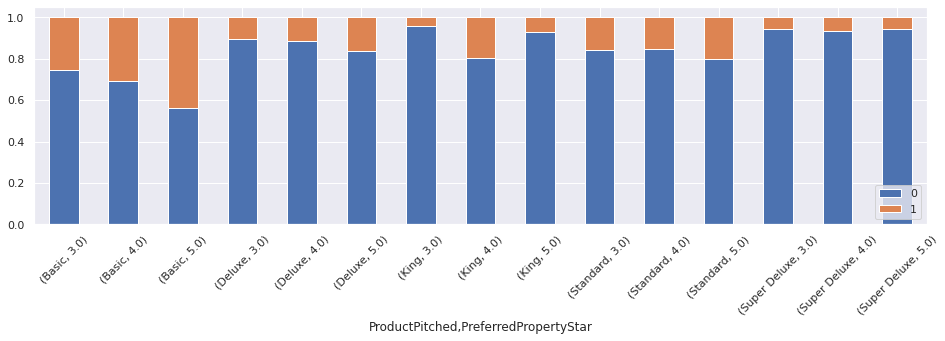

In [70]:
stacked_bar(['ProductPitched', 'PreferredPropertyStar'], 'ProdTaken')

**Observation:** 
- For Basic buyers, those preferring 5-star hotels are more likely to buy.
- For King buyers, those preferring 4-star hotels are more likely to buy.

### ProdTaken vs ProductPitched vs NumberOfTrips

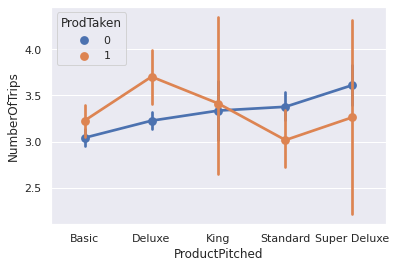

In [71]:
sns.pointplot(x = 'ProductPitched', y = 'NumberOfTrips', data = df, hue = 'ProdTaken');

**Observation:** Number of trips doesn't differ much among different travel packages buyers.

### ProdTaken vs ProductPitched vs NumberOfPersonVisiting

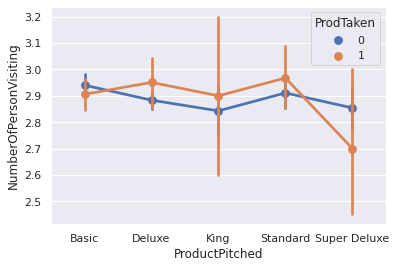

In [72]:
sns.pointplot(x = 'ProductPitched', y = 'NumberOfPersonVisiting', data = df, hue = 'ProdTaken');

**Observation:** Super Deluxe buyers have fewer traveling partners.

### ProdTaken vs ProductPitched vs NumberOfChildrenVisiting

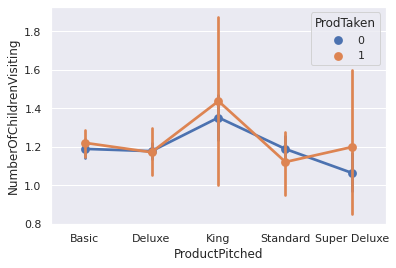

In [73]:
sns.pointplot(x = 'ProductPitched', y = 'NumberOfChildrenVisiting', data = df, hue = 'ProdTaken');

**Observation:** King buyers have more children with age less than 5 to take the trip.

### ProdTaken vs ProductPitched vs TypeofContact

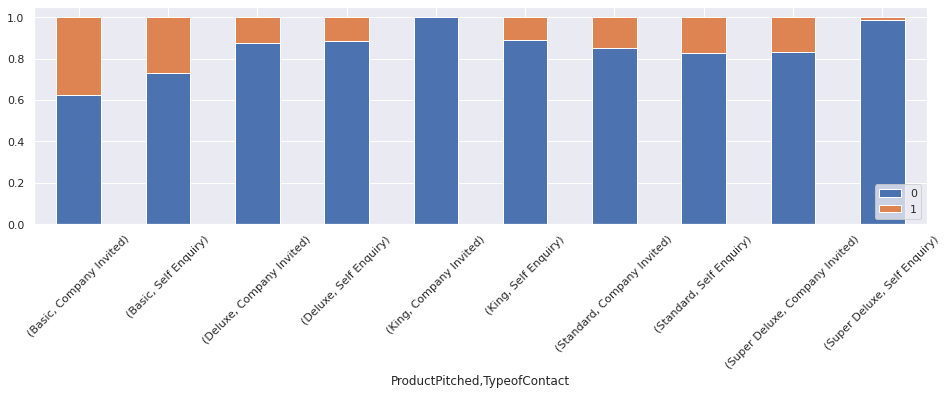

In [74]:
stacked_bar(['ProductPitched', 'TypeofContact'], 'ProdTaken')

**Observation:**
- Basic and Super Deluxe: customers contacted via company invited are more likely to buy.
- King: customers contacted via self inquiry are more likely to buy.
- Deluxe and Standard: customers contacted with either way make no difference.

### PitchSatisfactionScore vs DurationOfPitch

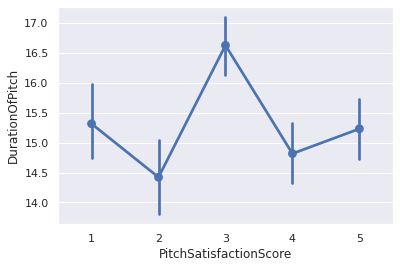

In [75]:
sns.pointplot(x = 'PitchSatisfactionScore', y = 'DurationOfPitch', data = df);

**Observation:** Customers giving score of 3 receive longer pitch. But if the duration of pitch is restricted less than 15.5 mins, it won't impact the score.

### PitchSatisfactionScore vs NumberOfFollowups

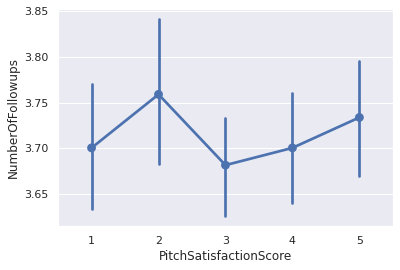

In [76]:
sns.pointplot(x = 'PitchSatisfactionScore', y = 'NumberOfFollowups', data = df);

**Observation:** The number of follow-ups doesn't affect sales pitch satisfaction score.

## <a id = "link5"></a> Data Pre-processing

### Missing Value Treatment

In [77]:
for col in df.select_dtypes(include = 'number').columns.to_list():
    df[col].fillna(df[col].median(), inplace = True)   # fill missing values in numerical columns with median
    
for col in df.select_dtypes(include = 'category').columns.to_list():
    df[col].fillna(df[col].mode()[0], inplace = True)  # fill missing values in categorical columns with mode

### Drop ProductPitched

The objective of this project is to figure out whether a customer will buy a travel package or not, regardless of the type of the product. Therefore, drop the ProductPitched column beofore model building.

In [78]:
df.drop('ProductPitched', axis = 1, inplace = True)

### Outlier Treatment

In [79]:
phase1 = df.copy()  # for debug use !!!!!

In [80]:
df = phase1.copy()   # for debug use !!!!!

In [81]:
# clip column based on IQR or bound
def outlier_clip(col, n = 1.5, bound_left = None, bound_right = None):
    """
    input:
    col: the name of column that needs to be clipped. String.
    n: multiples of IQR. float.
    bound_left: left bound. float.
    bound_right: right bound. float.
    
    output:
    None.
    """
    if not bound_left and not bound_right:  # use quantile
        q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        IQR =  q3 - q1
        df[col].clip(lower = q1 - n * IQR, upper = q3 + n * IQR, axis = 0, inplace = True)
    else:    # use bound
        df[col].clip(lower = bound_left, upper = bound_right, axis = 0, inplace = True)

- DurationOfPitch and NumberOfTrips: outliers on the upper end are far from the remaining ones, which should be clipped.
- MonthlyIncome: outliers smaller than 15000 or greater than 40000 are far from the remaining ones. They should be clipped. But those between 30000 and 39000 are close to each other. Had better keep them.
- NumberOfPersonVisiting and NumberOfFollowups: although they both have a few data points beyond 1.5 IQR, these data points are actually continuous. They should not be clipped.

In [82]:
outlier_clip('DurationOfPitch')
outlier_clip('NumberOfTrips', bound_left = 0, bound_right = 8)
outlier_clip('MonthlyIncome', bound_left = 15000, bound_right = 39000)

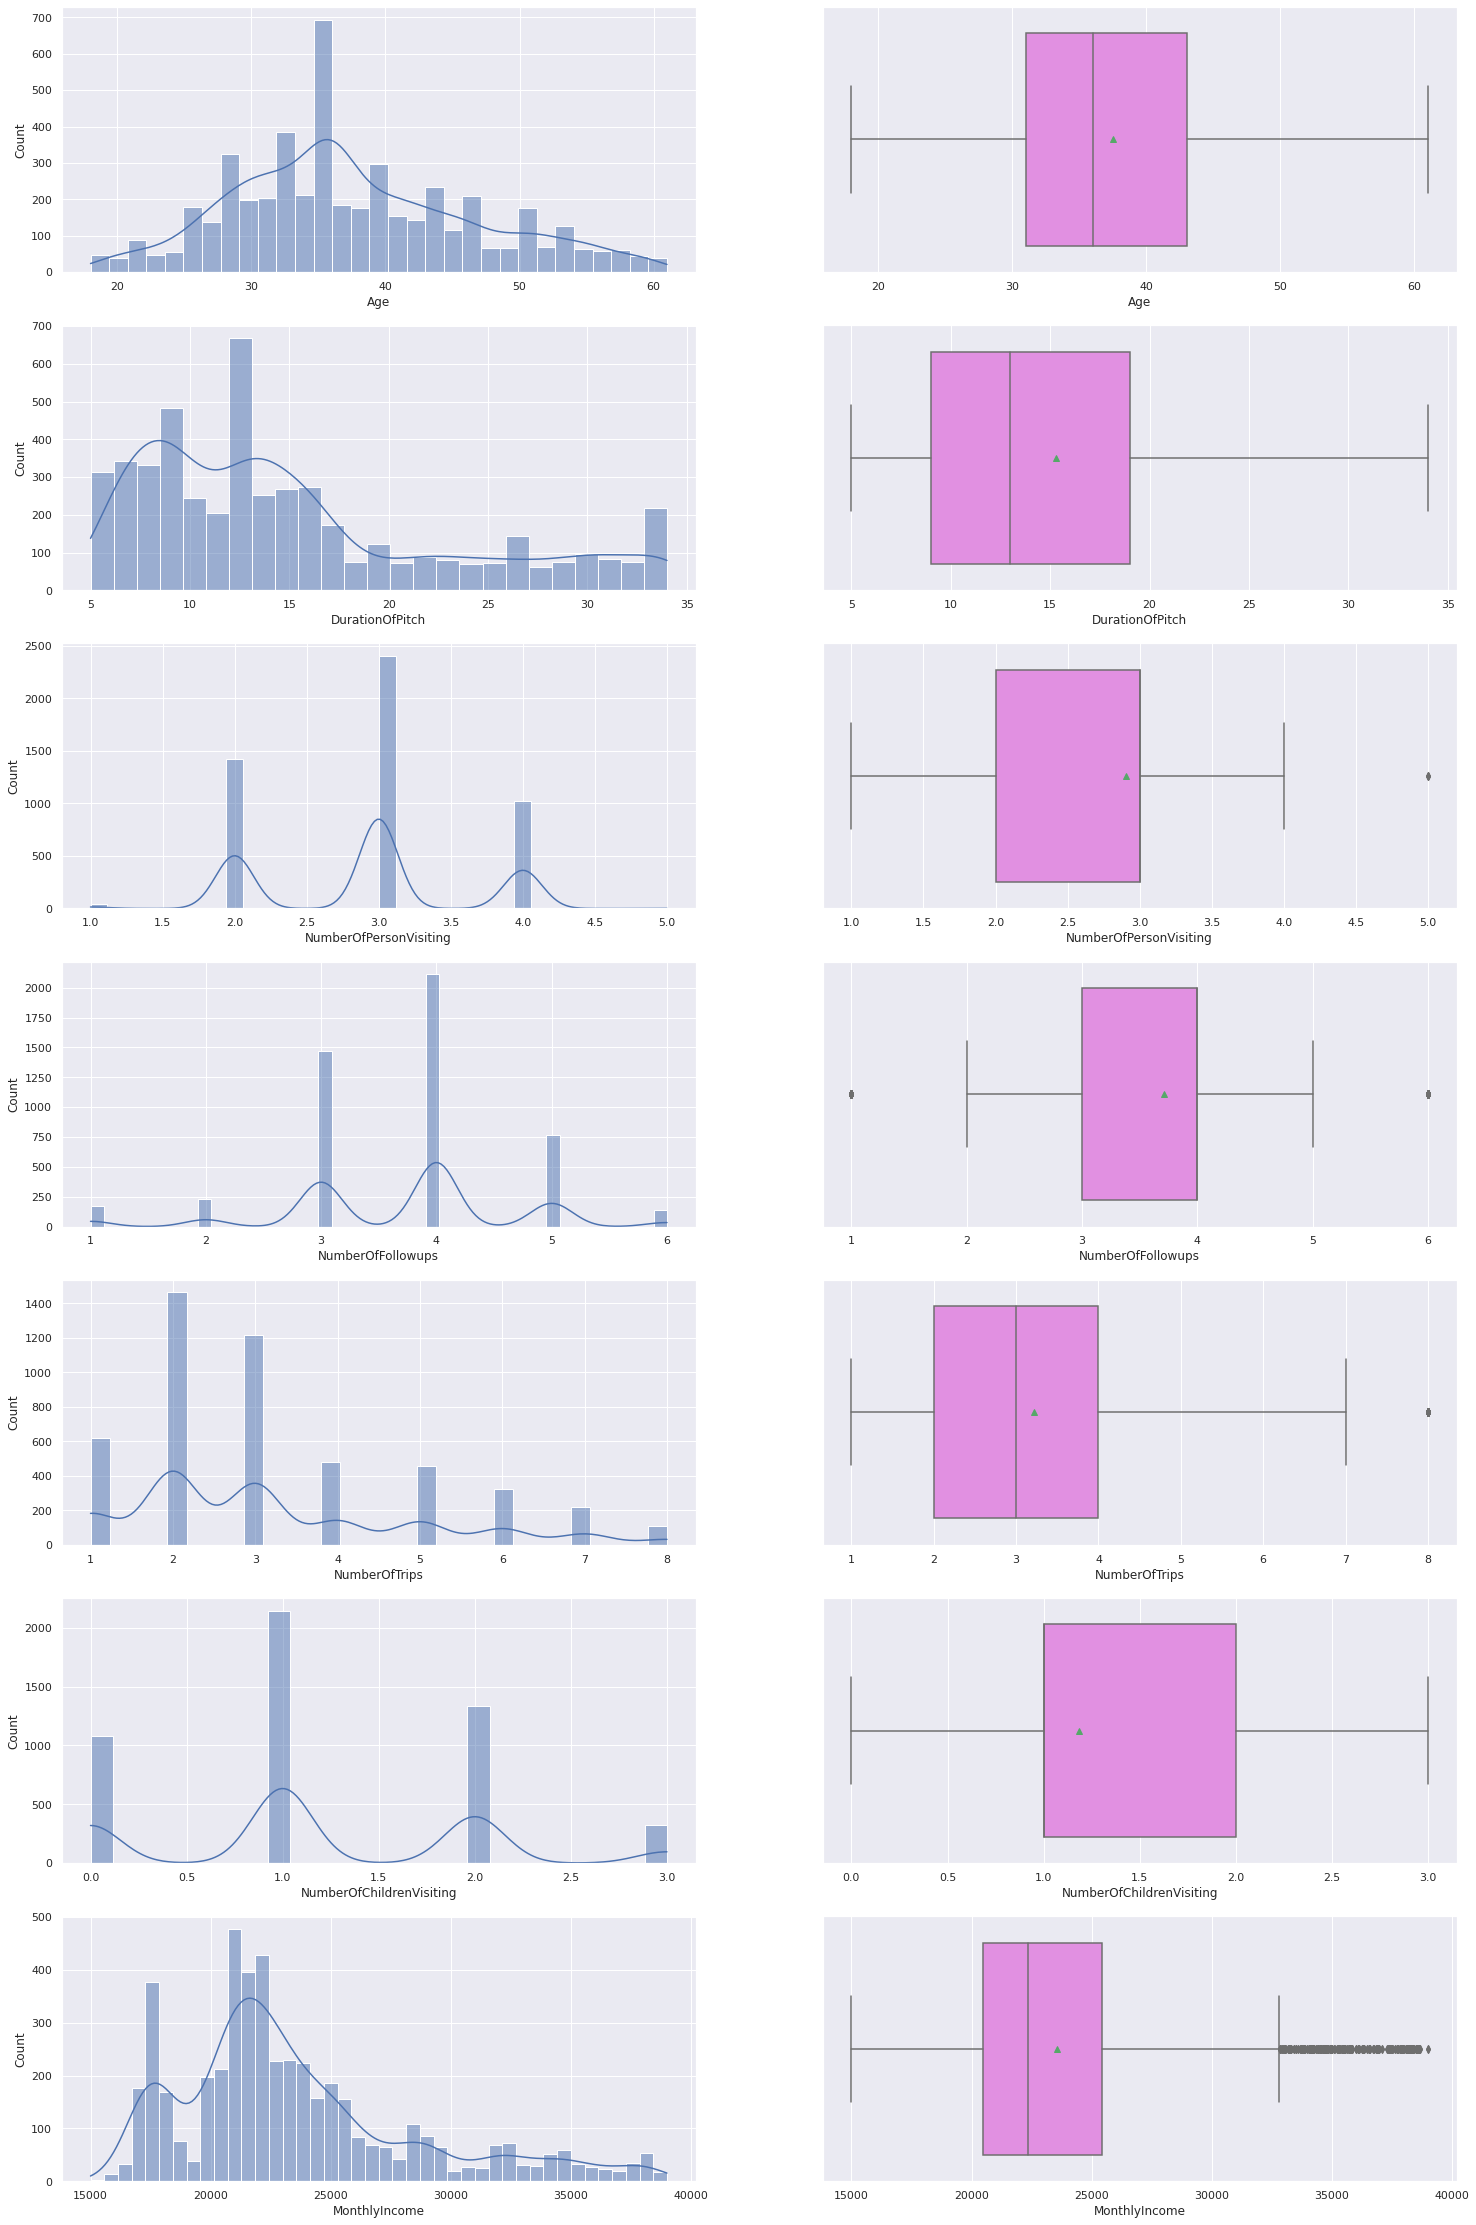

In [83]:
plt.figure(figsize = (25, 40))
for i, col in enumerate(df.select_dtypes(include = 'number').columns.to_list()):
    plt.subplot(7, 2, 2 * i + 1)
    sns.histplot(df[col], kde = True)     # histogram after outlier treatment
    plt.subplot(7, 2, 2 * i + 2)
    sns.boxplot(x = df[col], color = 'violet', showmeans = True)   # box plot after outlier treatment

### Convert Categorical Columns into Integer

CityTier, PreferredPropertyStar, PitchSatisfactionScore are ordinal categorical variables. In order to keep this order and since the XGBoost can't support categorical input, let's convert them back into integers.

In [84]:
for col in ['PreferredPropertyStar', 'PitchSatisfactionScore']:
    df[col] = df[col].astype('int')

df['CityTier_Order'] = df['CityTier'].astype('int')
df['CityTier_Order'] = df['CityTier_Order'].replace({1: 3, 3: 1})    # The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3

### Create Dummy Variables

In [85]:
X = df.drop(['ProdTaken', 'CityTier'], axis = 1)
X = pd.get_dummies(X, drop_first = True)
X.shape

(4888, 23)

In [86]:
X.head()

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome,CityTier_Order,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Passport_1,OwnCar_1,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,41.0,6.0,3,3.0,3,1.0,2,0.0,20993.0,1,1,0,1,0,0,0,1,1,1,0,1,0,0
1,49.0,14.0,3,4.0,4,2.0,3,2.0,20130.0,3,0,0,1,0,1,0,0,0,1,0,1,0,0
2,37.0,8.0,3,4.0,3,7.0,3,0.0,17090.0,3,1,0,0,0,1,0,1,1,0,1,0,0,0
3,33.0,9.0,2,3.0,3,2.0,5,1.0,17909.0,3,0,0,1,0,0,0,0,1,1,1,0,0,0
4,36.0,8.0,2,3.0,4,1.0,5,0.0,18468.0,3,1,0,0,1,1,0,0,0,1,1,0,0,0


### Split Data

In [87]:
y = df['ProdTaken']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: ProdTaken, dtype: category
Categories (2, int64): [0, 1]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 19)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3421, 23) (3421,)
(1467, 23) (1467,)


In [89]:
print(y.value_counts(1))
print(y_train.value_counts(1))
print(y_test.value_counts(1))

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64
0    0.811751
1    0.188249
Name: ProdTaken, dtype: float64
0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64


## <a id = "link6"></a> Model Building and Evaluation 

### Model evaluation criterion

#### Model can make wrong predictions as:
1. Predicting a customer will buy the package when she/he is not going to do so.
2. Predicting a customer won't buy the package when she/he actually buys it.

#### Which case is more important? 
1. If the model predicts a customer is a buyer but actually she/ he isn't, then the company will waste marketing resources on it.
2. If the model predicts a customer isn't a buyer but actually she/ he is, then the company will lose the opportunity to make money and expand the customer base. 

#### Which metric to optimize?
* Maximize recall so that the company could identify as many potential buyers as possible.

In [90]:
def compute_metrics(model, X_train, X_test, y_train, y_test):
    """
    This function is to compute accuracy, precision, recall and f1 score for both training set and test set
    
    Input:
    model: model before fitting.
    X_train: independent variables of training set. Dimension: (m, k).
    y_train: true class labels of training set. Dimension: (m, ).    
    X_test: independent variables of test set. Dimension: (n, k).
    y_test: true class labels of test set. Dimension: (n, ). 


    Return:
    A model fitted with training set. Predictions and a dataframe of metrics for both training and test set.
    """    
    model = model.fit(X_train, y_train)
  
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    metrics_df = pd.DataFrame([accuracy_train, accuracy_test, recall_train, recall_test, precision_train, precision_test, f1_train, f1_test],
                                                 index = ["Accuracy Train", "Accuracy Test", "Recall Train", "Recall Test", 
                                                                    "Precision Train", "Precision Test", "F1 Train", "F1 Test"]).T
    
    return model, y_pred_train, y_pred_test, metrics_df

In [91]:
def generate_confusion_matrix(y_true, y_pred, labels = [0, 1]):
    """
    This function is to plot the confusion matrix as a heatmap.
    
    Input:
    y_true: true class labels.
    y_pred: predicted class labels.
    labels: a list of class labels.
    
    Return:
    None.
    """
    matrix = confusion_matrix(y_true, y_pred, labels = labels)  # return a n_class x n_class ndarray, i-th row and j-th column entry 
                                                                                                 # indicates the number of samples with true label being i-th class 
                                                                                                 # and predicted label being j-th class.
    matrix_df = pd.DataFrame(matrix)
    
    group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]   # absolute value
    group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]    # percent
    plot_labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    plot_labels = np.asarray(plot_labels).reshape(2,2)   # reshape into a n_class x n_class ndarray
    
    plt.figure(figsize = (7,5))
    sns.heatmap(matrix_df, annot = plot_labels, fmt='')
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')

In [92]:
# set display format for dataframe
pd.set_option('display.float_format', '{:0.3f}'.format)

# dictionary of model name and metrics dataframe
models = {}

### <a id = "link7"></a> Decision Tree

### (1) Default Setting

In [93]:
dtree = DecisionTreeClassifier(random_state = 2)
dtree, y_pred_train, y_pred_test, metrics = compute_metrics(dtree, X_train, X_test, y_train, y_test)
models["Decision_Tree"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,1.000,0.905,1.000,0.775,1.000,0.735,1.000,0.755


**Observation:**
- The model is overfitting.
- Test accuracy is 0.905. Test recall is 0.775. Both are acceptable.

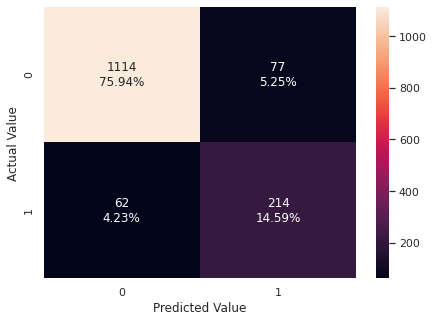

In [94]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [95]:
pd.DataFrame(data = dtree.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False).T

,DurationOfPitch,MonthlyIncome,Age,NumberOfTrips,Designation_Executive,Passport_1,MaritalStatus_Single,PitchSatisfactionScore,CityTier_Order,PreferredPropertyStar,NumberOfFollowups,Gender_Male,TypeofContact_Self Enquiry,Occupation_Salaried,Occupation_Small Business,Occupation_Large Business,NumberOfPersonVisiting,Designation_Manager,Designation_Senior Manager,NumberOfChildrenVisiting,MaritalStatus_Married,OwnCar_1,Designation_VP
feature importance,0.130,0.108,0.102,0.078,0.078,0.063,0.054,0.048,0.047,0.046,0.045,0.043,0.029,0.023,0.021,0.019,0.014,0.013,0.012,0.012,0.009,0.004,0.002


**Observation:** The model identifies DurationOfPitch, MonthlyIncome, Age as the most important features.

### (2) Tuning

In [96]:
para = {
    'max_depth': list(np.arange(5, 19)) + [None],
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10),
    'max_features': [None, 0.7, 0.8, "sqrt", "log2"],
    'min_impurity_decrease': [0.01, 0.001, 0.0001, 0],
}
dtree_tuned = DecisionTreeClassifier(random_state = 2, class_weight = {0: 0.2, 1: 0.8})
clf = GridSearchCV(dtree_tuned, para, scoring ='recall', n_jobs = -1, cv = 3).fit(X_train, y_train)
clf.best_estimator_

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=12,
                       max_features=0.7, min_impurity_decrease=0.001,
                       min_samples_leaf=9, random_state=2)

In [97]:
dtree_tuned, y_pred_train, y_pred_test, metrics = compute_metrics(clf.best_estimator_, X_train, X_test, y_train, y_test)
models["Decision_Tree_Tuned"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,0.819,0.776,0.924,0.841,0.510,0.449,0.657,0.585


**Observation:** 
- The model is slightly overfitting. 
- Test accuracy is 0.776, lower than default setting. Test recall is 0.841, higher than default setting. 

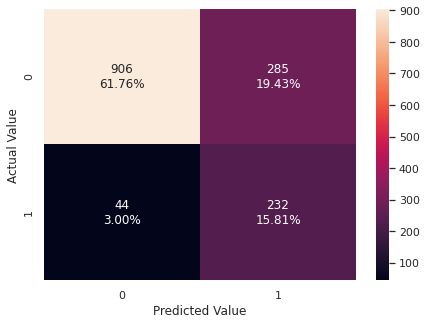

In [98]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [99]:
pd.DataFrame(data = dtree_tuned.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False).T

,Passport_1,DurationOfPitch,MaritalStatus_Single,MonthlyIncome,CityTier_Order,PreferredPropertyStar,Age,PitchSatisfactionScore,NumberOfTrips,Designation_Manager,Designation_Executive,Occupation_Small Business,Gender_Male,NumberOfFollowups,TypeofContact_Self Enquiry,NumberOfPersonVisiting,Designation_Senior Manager,OwnCar_1,MaritalStatus_Married,NumberOfChildrenVisiting,Occupation_Large Business,Occupation_Salaried,Designation_VP
feature importance,0.159,0.135,0.090,0.080,0.074,0.074,0.073,0.047,0.040,0.039,0.038,0.034,0.031,0.022,0.018,0.015,0.012,0.007,0.007,0.006,0.000,0.000,0.000


**Observation:** The model identifies Passport_1, DurationOfPitch, MaritalStatus_Single as the most important features.

### (3) Cost Complexity Pruning

In [208]:
dtree_pruned = DecisionTreeClassifier(random_state = 2, class_weight= {0: 0.2, 1: 0.8})
ccp_path = dtree_pruned.cost_complexity_pruning_path(X_train, y_train)

pd.DataFrame(ccp_path)

,ccp_alphas,impurities
0,0.000,-0.000
1,0.000,-0.000
2,0.000,-0.000
3,0.000,-0.000
4,0.000,-0.000
...,...,...
292,0.011,0.407
293,0.014,0.420
294,0.014,0.434
295,0.020,0.454


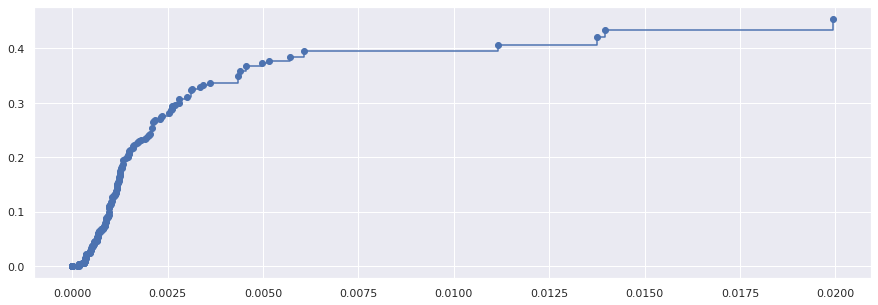

In [209]:
alpha = ccp_path['ccp_alphas'][:-1]
impurity = ccp_path['impurities'][:-1]
plt.figure(figsize = (15,5))
plt.plot(alpha, impurity, marker = 'o', drawstyle="steps-post");

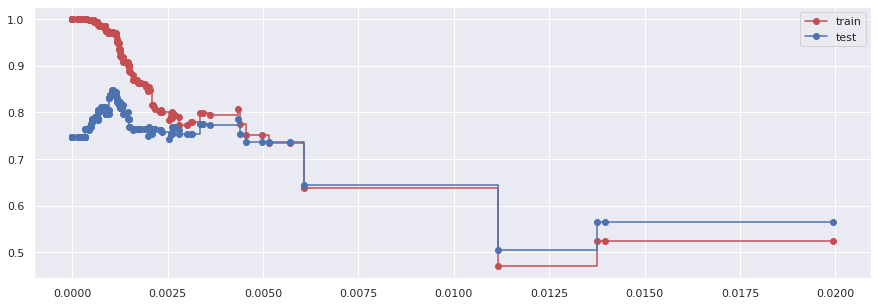

In [210]:
train_recall = []
test_recall = []

for a in alpha:
    dtree_pruned = DecisionTreeClassifier(random_state = 2, class_weight={0: 0.2, 1: 0.8}, ccp_alpha = a).fit(X_train, y_train)
    pred_train = dtree_pruned.predict(X_train)
    pred_test = dtree_pruned.predict(X_test)
    train_recall.append(recall_score(y_train, pred_train))
    test_recall.append(recall_score(y_test, pred_test))    
    
plt.figure(figsize = (15,5));
plt.plot(alpha, train_recall, marker = 'o', drawstyle="steps-post", color = 'r', label = "train");
plt.plot(alpha, test_recall, marker = 'o', drawstyle="steps-post", color = 'b', label = "test");
plt.legend(loc = "upper right");

In [211]:
idx = np.argmax(test_recall)
optimal_alpha = alpha[idx]
print("optimal_alpha:", optimal_alpha)

optimal_alpha: 0.0010337845002896847


In [212]:
dtree_pruned = DecisionTreeClassifier(random_state = 2, class_weight= {0: 0.2, 1: 0.8}, ccp_alpha = optimal_alpha)
dtree_pruned, y_pred_train, y_pred_test, metrics = compute_metrics(dtree_pruned, X_train, X_test, y_train, y_test)
models["Decision_Tree_Pruned"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,0.899,0.834,0.972,0.848,0.657,0.538,0.784,0.658


**Observation:** 
- The model is slightly overfitting. 
- Test accuracy is 0.834, higher than pre-pruning. Test recall is 0.848, higher than pre-pruning. 

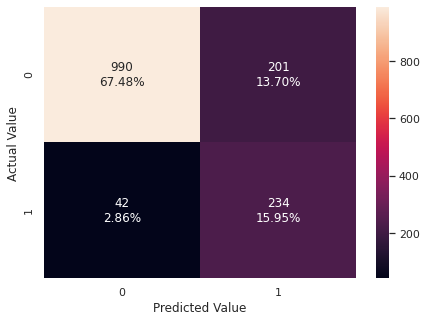

In [213]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [214]:
pd.DataFrame(data = dtree_pruned.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False).T

,DurationOfPitch,Passport_1,MonthlyIncome,Age,Designation_Executive,CityTier_Order,MaritalStatus_Single,NumberOfTrips,PitchSatisfactionScore,PreferredPropertyStar,NumberOfFollowups,Designation_Manager,TypeofContact_Self Enquiry,Gender_Male,Occupation_Large Business,NumberOfChildrenVisiting,Occupation_Salaried,NumberOfPersonVisiting,Designation_Senior Manager,Occupation_Small Business,OwnCar_1,MaritalStatus_Married,Designation_VP
feature importance,0.126,0.120,0.112,0.104,0.083,0.074,0.055,0.052,0.050,0.045,0.043,0.029,0.021,0.015,0.014,0.011,0.011,0.011,0.008,0.008,0.007,0.000,0.000


**Observation:** The model identifies DurationOfPitch, Passport_1, MonthlyIncome as the most important features.

### <a id = "link8"></a> Random Forest

### (1) Default Setting

In [100]:
rf = RandomForestClassifier(random_state = 2, n_jobs = -1)
rf, y_pred_train, y_pred_test, metrics = compute_metrics(rf, X_train, X_test, y_train, y_test)
models["Random_Forest"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,1.000,0.912,1.000,0.576,1.000,0.930,1.000,0.711


**Observation:** 
- The model is overfitting.
- Test accuracy is 0.912. Test recall is 0.576, a very poor result.

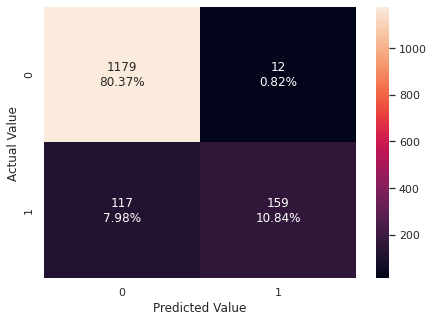

In [101]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [102]:
pd.DataFrame(data = rf.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False).T

,Age,MonthlyIncome,DurationOfPitch,Passport_1,NumberOfTrips,PitchSatisfactionScore,NumberOfFollowups,PreferredPropertyStar,Designation_Executive,CityTier_Order,MaritalStatus_Single,NumberOfChildrenVisiting,NumberOfPersonVisiting,Gender_Male,TypeofContact_Self Enquiry,OwnCar_1,Occupation_Salaried,Occupation_Small Business,Designation_Manager,MaritalStatus_Married,Occupation_Large Business,Designation_Senior Manager,Designation_VP
feature importance,0.126,0.126,0.104,0.073,0.065,0.063,0.052,0.047,0.038,0.038,0.036,0.030,0.028,0.026,0.025,0.021,0.020,0.020,0.018,0.017,0.015,0.011,0.003


**Observation:** The model identifies Age, MonthlyIncome, DurationOfPitch as the most important features.

### (2) Tuning

In [103]:
para = {
#     'max_depth': list(np.arange(4, 8)) + [None],
    'min_samples_split': np.arange(2, 9),
    'min_samples_leaf': np.arange(1, 6),
    'max_features': ['sqrt', 'log2', 0.7, 0.8],
    'min_impurity_decrease': [0.001, 0.0001, 0],
    'max_samples': [None, 0.8, 0.9],
}
rf_tuned = RandomForestClassifier(random_state = 2, class_weight = {0: 0.2, 1: 0.8}, n_jobs = -1)
clf = GridSearchCV(rf_tuned, para, scoring ='recall', n_jobs = -1, cv = 3).fit(X_train, y_train)
clf.best_estimator_

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_features='sqrt',
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       n_jobs=-1, random_state=2)

In [104]:
rf_tuned, y_pred_train, y_pred_test, metrics = compute_metrics(clf.best_estimator_, X_train, X_test, y_train, y_test)
models["Random_Forest_Tuned"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,0.869,0.851,0.781,0.717,0.621,0.586,0.692,0.645


**Observation:** 
- The model generalizes well with train and test set. 
- Test accuracy is 0.851, lower than default setting but still good. Test recall is 0.717, much better than default setting.

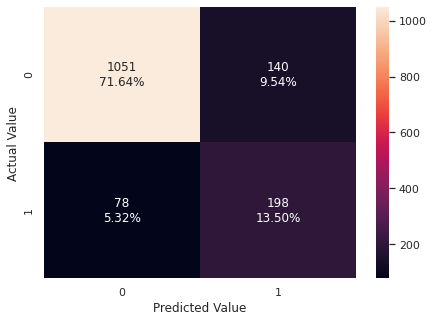

In [105]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [106]:
pd.DataFrame(data = rf_tuned.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False).T

,Passport_1,Age,MonthlyIncome,Designation_Executive,DurationOfPitch,MaritalStatus_Single,CityTier_Order,PitchSatisfactionScore,PreferredPropertyStar,NumberOfFollowups,Designation_Manager,NumberOfTrips,MaritalStatus_Married,Gender_Male,Designation_Senior Manager,Occupation_Large Business,TypeofContact_Self Enquiry,Occupation_Salaried,Occupation_Small Business,NumberOfPersonVisiting,NumberOfChildrenVisiting,OwnCar_1,Designation_VP
feature importance,0.168,0.114,0.099,0.095,0.078,0.076,0.050,0.042,0.040,0.036,0.036,0.035,0.028,0.015,0.014,0.012,0.011,0.010,0.010,0.010,0.009,0.008,0.005


**Observation:** This model identifies Passport_1, Age, MonthlyIncome as the most important features.

### <a id = "link9"></a> Bagging Classifier

### (1) Default Setting

In [107]:
bg = BaggingClassifier(random_state = 2, n_jobs = -1)
bg, y_pred_train, y_pred_test, metrics = compute_metrics(bg, X_train, X_test, y_train, y_test)
models["Bagging"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,0.995,0.922,0.972,0.663,1.000,0.897,0.986,0.762


**Observation:** 
- The model is overfitting.
- Test accuracy is 0.922. Test recall is 0.663, a very poor result.

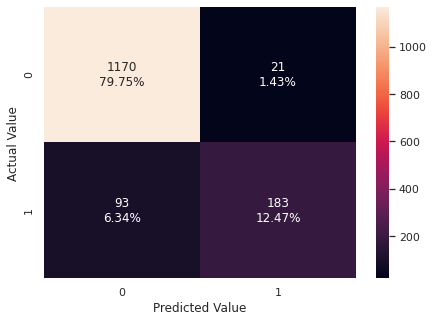

In [108]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

### (2) Tuning

In [109]:
para = {
    'base_estimator': [
        DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8}, max_depth = 2), 
        DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8}, max_depth = 3),       
        DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8}, max_depth = 4),
    ],
    'n_estimators': [10, 30, 50, 70],
    'max_features': [0.6, 0.65, 0.7, 0.8, 0.9, 1],
    'max_samples':  [0.6, 0.65, 0.7, 0.8, 0.9],
}
bg_tuned = BaggingClassifier(random_state = 2, n_jobs = -1)
clf = GridSearchCV(bg_tuned, para, scoring ='recall', n_jobs = -1, cv = 3).fit(X_train, y_train)
clf.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                      1: 0.8},
                                                        max_depth=3,
                                                        random_state=7),
                  max_features=0.6, max_samples=0.9, n_jobs=-1, random_state=2)

In [110]:
bg_tuned, y_pred_train, y_pred_test, metrics = compute_metrics(clf.best_estimator_, X_train, X_test, y_train, y_test)
models["Bagging_Tuned"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,0.765,0.761,0.700,0.699,0.425,0.420,0.529,0.524


**Observation:** 
- The model generalizes well with training set and test set.  
- Test accuracy is 0.761, lower than default setting. Test recall is 0.699, slightly higher than default setting. Test precision and f1 score become much worse than default setting.

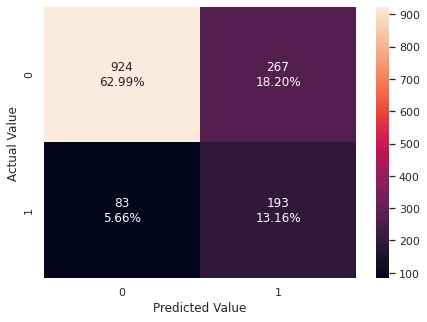

In [111]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

### <a id = "link10"></a>Adaboost Classifier

### (1) Default Setting

In [112]:
ad = AdaBoostClassifier(random_state = 2)
ad, y_pred_train, y_pred_test, metrics = compute_metrics(ad, X_train, X_test, y_train, y_test)
models["Adaboost"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,0.847,0.852,0.334,0.380,0.696,0.695,0.451,0.492


**Observation:** 
- The model generalizes well with train and test set.
- Test accuracy is 0.852. Test recall is 0.380, a very poor result.

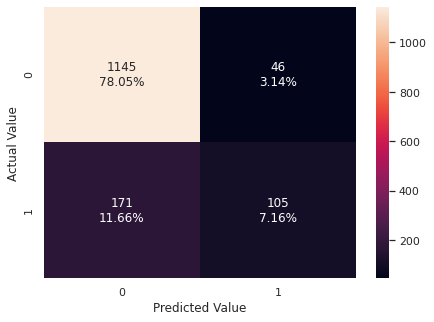

In [113]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [114]:
pd.DataFrame(data = ad.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False).T

,MonthlyIncome,Age,NumberOfFollowups,DurationOfPitch,NumberOfTrips,Designation_Senior Manager,PreferredPropertyStar,Passport_1,CityTier_Order,Gender_Male,Designation_Executive,MaritalStatus_Single,Occupation_Large Business,TypeofContact_Self Enquiry,NumberOfChildrenVisiting,PitchSatisfactionScore,NumberOfPersonVisiting,Occupation_Small Business,Occupation_Salaried,MaritalStatus_Married,OwnCar_1,Designation_Manager,Designation_VP
feature importance,0.260,0.160,0.100,0.100,0.060,0.040,0.040,0.040,0.040,0.020,0.020,0.020,0.020,0.020,0.020,0.020,0.020,0.000,0.000,0.000,0.000,0.000,0.000


**Observation:** The model identifies MonthlyIncome, Age, NumberOfFollowups as the most important features.

### (2) Tuning

In [115]:
para = {
    'base_estimator': [
        DecisionTreeClassifier(random_state = 7, max_depth = 2, class_weight = {0: 0.2, 1: 0.8}), 
        DecisionTreeClassifier(random_state = 7, max_depth = 3, class_weight = {0: 0.2, 1: 0.8}), 
        DecisionTreeClassifier(random_state = 7, max_depth = 4, class_weight = {0: 0.2, 1: 0.8}),
    ],
    'n_estimators': [50, 70, 100, 120],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
}
ad_tuned = AdaBoostClassifier(random_state = 2)
clf = GridSearchCV(ad_tuned, para, scoring ='recall', n_jobs = -1, cv = 3).fit(X_train, y_train)
clf.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.2,
                                                                       1: 0.8},
                                                         max_depth=2,
                                                         random_state=7),
                   learning_rate=0.2, random_state=2)

In [116]:
ad_tuned, y_pred_train, y_pred_test, metrics = compute_metrics(clf.best_estimator_, X_train, X_test, y_train, y_test)
models["Adaboost_Tuned"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,0.805,0.803,0.748,0.746,0.488,0.485,0.591,0.588


**Observation:** 
- The model generalizes well with training set and test set.  
- Test accuracy is 0.803, lower than default setting. Test recall is 0.746, much better than default setting. But test precision is much worse than default setting.

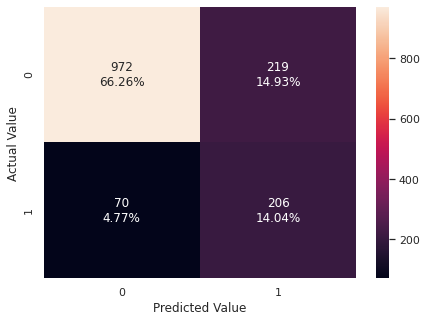

In [117]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [118]:
pd.DataFrame(data = ad_tuned.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False).T

,Age,DurationOfPitch,NumberOfFollowups,Passport_1,PitchSatisfactionScore,Designation_Executive,MaritalStatus_Single,PreferredPropertyStar,MonthlyIncome,CityTier_Order,Designation_Senior Manager,NumberOfTrips,Gender_Male,NumberOfPersonVisiting,TypeofContact_Self Enquiry,Occupation_Large Business,MaritalStatus_Married,Designation_Manager,Occupation_Small Business,OwnCar_1,Occupation_Salaried,NumberOfChildrenVisiting,Designation_VP
feature importance,0.165,0.102,0.093,0.091,0.068,0.065,0.064,0.063,0.061,0.059,0.042,0.037,0.025,0.019,0.015,0.014,0.006,0.006,0.005,0.000,0.000,0.000,0.000


**Observation:** The model identifies Age, DurationOfPitch and NumberOfFollowups as the most important features.

### <a id = "link11"></a>Gradient Boosting Classifier

### (1) Default Setting

In [119]:
gbc = GradientBoostingClassifier(random_state = 2)
gbc, y_pred_train, y_pred_test, metrics = compute_metrics(gbc, X_train, X_test, y_train, y_test)
models["Gradient_Boosting"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,0.888,0.866,0.478,0.413,0.868,0.770,0.617,0.538


**Observation:** 
- The model generalizes well with training set and test set.  
- Test accuracy is 0.866, pretty good. Test recall is 0.413, a poor result.

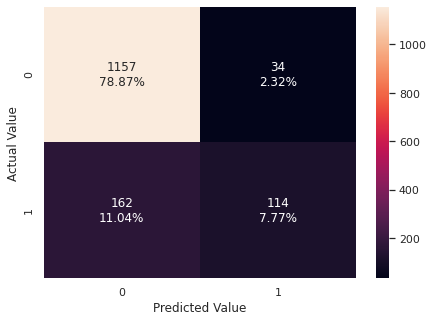

In [120]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [121]:
pd.DataFrame(data = gbc.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False).T

,Passport_1,Designation_Executive,Age,MonthlyIncome,MaritalStatus_Single,DurationOfPitch,CityTier_Order,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,Designation_Senior Manager,TypeofContact_Self Enquiry,Designation_Manager,Occupation_Large Business,Gender_Male,NumberOfPersonVisiting,MaritalStatus_Married,NumberOfChildrenVisiting,OwnCar_1,Occupation_Small Business,Occupation_Salaried,Designation_VP
feature importance,0.156,0.143,0.132,0.128,0.088,0.067,0.056,0.055,0.054,0.029,0.025,0.014,0.014,0.010,0.010,0.009,0.006,0.002,0.002,0.001,0.000,0.000,0.000


**Observation:** The model identifies Passport_1, Designation_Executive, Age as the most important features.

### (2) Tuning

In [122]:
para = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'min_samples_split': [2, 3, 5, 6],
    'min_samples_leaf': [1, 2, 5, 7],
    'max_depth': [2, 3, 4],
    'subsample': [0.6, 0.8, 1],
    'max_features':['sqrt', 'log2', 0.7, 0.8],
}
gbc_tuned = GradientBoostingClassifier(random_state = 2, n_estimators = 150)
clf = GridSearchCV(gbc_tuned, para, scoring ='recall', n_jobs = -1, cv = 3).fit(X_train, y_train)
clf.best_estimator_

GradientBoostingClassifier(learning_rate=0.4, max_depth=4, max_features=0.7,
                           min_samples_split=6, n_estimators=150,
                           random_state=2, subsample=1)

In [123]:
gbc_tuned, y_pred_train, y_pred_test, metrics = compute_metrics(clf.best_estimator_, X_train, X_test, y_train, y_test)
models["Gradient_Boosting_Tuned"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,0.999,0.906,0.995,0.656,1.000,0.808,0.998,0.724


**Observation:** 
- The model is overfitting with training set.  
- Test accuracy is 0.906, better than default setting. Test recall is 0.656, better than default setting.

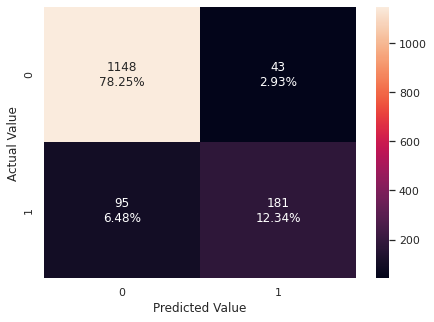

In [124]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [125]:
pd.DataFrame(data = gbc_tuned.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False).T

,MonthlyIncome,Age,Passport_1,Designation_Executive,DurationOfPitch,MaritalStatus_Single,PreferredPropertyStar,PitchSatisfactionScore,CityTier_Order,NumberOfTrips,NumberOfFollowups,Designation_Senior Manager,TypeofContact_Self Enquiry,Gender_Male,Designation_Manager,Occupation_Large Business,NumberOfPersonVisiting,NumberOfChildrenVisiting,Occupation_Small Business,Designation_VP,MaritalStatus_Married,Occupation_Salaried,OwnCar_1
feature importance,0.224,0.127,0.085,0.083,0.077,0.058,0.052,0.049,0.047,0.041,0.032,0.026,0.021,0.015,0.013,0.012,0.010,0.007,0.007,0.004,0.004,0.003,0.003


**Observation:** The model identifies MonthlyIncome, Age, Passport_1 as the most important features.

### <a id = "link12"></a>Xgboost Classifier

### (1) Default Setting

In [126]:
xgc = XGBClassifier(random_state = 2, eval_metric='logloss', n_jobs = -1)
xgc, y_pred_train, y_pred_test, metrics = compute_metrics(xgc, X_train, X_test, y_train, y_test)
models["XGBoost"] = metrics.copy()
metrics

[13:10:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,1.000,0.932,0.998,0.703,1.000,0.915,0.999,0.795


**Observation:** 
- The model is overfitting with training set.  
- Test accuracy is 0.932. Test recall for is 0.703.

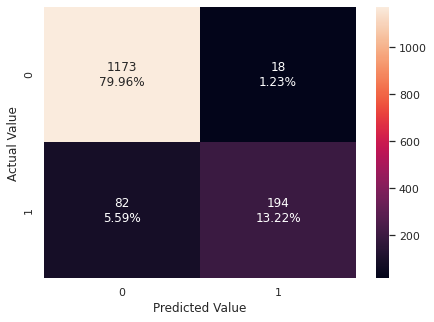

In [127]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [128]:
pd.DataFrame(data = xgc.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False).T

,Designation_Executive,Passport_1,MaritalStatus_Single,CityTier_Order,Designation_Senior Manager,NumberOfTrips,PreferredPropertyStar,Occupation_Large Business,DurationOfPitch,TypeofContact_Self Enquiry,NumberOfFollowups,PitchSatisfactionScore,Age,Designation_VP,MonthlyIncome,Designation_Manager,NumberOfPersonVisiting,Occupation_Salaried,Occupation_Small Business,Gender_Male,MaritalStatus_Married,OwnCar_1,NumberOfChildrenVisiting
feature importance,0.166,0.093,0.070,0.056,0.045,0.041,0.040,0.039,0.039,0.039,0.039,0.037,0.035,0.034,0.029,0.028,0.028,0.027,0.027,0.025,0.021,0.021,0.020


**Observation:** The model identifies Designation_Executive, Passport_1, MaritalStatus_Single as the most important features.

### (2) Tuning

In [129]:
# run on GPU
# para = {
#     'learning_rate': [0.2, 0.3, 0.4, 0.5, 0.55, 0.6],
#     'gamma': [1, 2, 3],
#     'subsample': [0.6, 0.7, 0.8],
#     'colsample_bytree': [0.6, 0.7, 0.8],
#     'colsample_bylevel': [0.6, 0.7, 0.8],
#     'max_depth': np.arange(4, 8),
# }
# xgc = XGBClassifier(random_state = 2, scale_pos_weight = 4, booster = 'gbtree', eval_metric='logloss', tree_method = 'gpu_hist', n_jobs = -1)
# clf = GridSearchCV(xgc, para, scoring ='recall', n_jobs = -1, cv = 3).fit(X_train, y_train)
# clf.best_estimator_

In [130]:
# run on CPU
para = {
    'learning_rate': [0.4, 0.5, 0.6],
    'subsample': [0.6, 0.7, 0.8],
}
xgc_tuned = XGBClassifier(random_state = 2, scale_pos_weight = 4, booster = 'gbtree', eval_metric='logloss',colsample_bytree = 0.6, 
                    colsample_bylevel = 0.7, gamma = 1, n_jobs = -1)
clf = GridSearchCV(xgc_tuned, para, scoring ='recall', n_jobs = -1, cv = 3).fit(X_train, y_train)
clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=2, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=4, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [131]:
xgc_tuned, y_pred_train, y_pred_test, metrics = compute_metrics(clf.best_estimator_, X_train, X_test, y_train, y_test)
models["XGBoost_Tuned"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,0.999,0.923,1.000,0.768,0.994,0.812,0.997,0.790


**Observation:** 
- The model is overfitting with training set.  
- Test accuracy is 0.923, slightly lower than default setting. Test recall is 0.768, better than default setting.

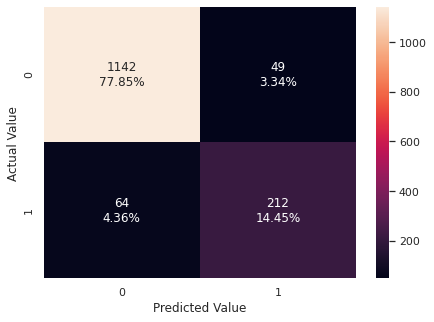

In [132]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

In [133]:
pd.DataFrame(data = xgc_tuned.feature_importances_, index = X_train.columns, 
             columns = ["feature importance"]).sort_values(by = "feature importance", ascending = False).T

,Passport_1,Designation_Executive,MaritalStatus_Single,MaritalStatus_Married,CityTier_Order,PreferredPropertyStar,Age,PitchSatisfactionScore,DurationOfPitch,Designation_Manager,MonthlyIncome,NumberOfFollowups,NumberOfTrips,Designation_VP,Designation_Senior Manager,Gender_Male,TypeofContact_Self Enquiry,Occupation_Salaried,OwnCar_1,NumberOfChildrenVisiting,Occupation_Large Business,Occupation_Small Business,NumberOfPersonVisiting
feature importance,0.108,0.078,0.055,0.054,0.050,0.048,0.048,0.045,0.044,0.043,0.042,0.040,0.040,0.038,0.037,0.037,0.033,0.031,0.030,0.027,0.027,0.025,0.019


**Observation:** The model identifies Passport_1, Designation_Executive, MaritalStatus_Single as the most important features.

### <a id = "link13"></a>Stacking Classifier

### (1) Default Setting

In [216]:
estimators = [ 
    ('Gradient Boosting Tuned', gbc_tuned), 
    ('Gradient Boosting', gbc), 
    ('Random Forest Tuned', rf_tuned),
    ('Random Forest', rf),
    ('Bagging Tuned', bg_tuned),
    ('Bagging', bg),
    ('Logistic Regression', LogisticRegression(random_state =2)),
    ("XGBoost Tuned", xgc_tuned),      
    ("XGBoost", xgc),
    ("Decision Tree Pruned", dtree_pruned),
    ("Decision Tree Tuned", dtree_tuned),    
    ("Decision Tree", dtree),
    ("Adaboost Tuned", ad_tuned),    
    ("Adaboost", ad),
] # all the previous models plus logistic regression

sc = StackingClassifier(estimators = estimators, cv = 5, n_jobs = -1, passthrough = True)  # final_estimator use logistic regression

sc, y_pred_train, y_pred_test, metrics = compute_metrics(sc, X_train, X_test, y_train, y_test)
models["Stacking"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,0.993,0.928,0.977,0.746,0.986,0.855,0.981,0.797


**Observation:** 
- The model is overfitting with training set.
- Test accuracy is 0.928. Test recall is 0.746.

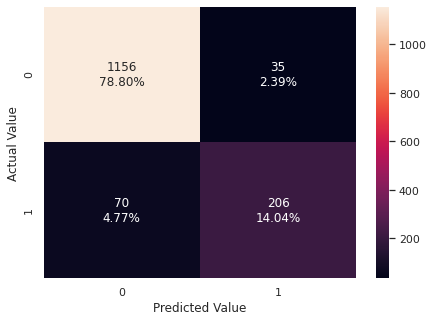

In [217]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

### (2) Tuning

In [218]:
para = {
    'final_estimator': [ dtree, dtree_tuned, dtree_pruned, rf, rf_tuned, bg, bg_tuned, ad, ad_tuned, gbc, gbc_tuned, xgc, xgc_tuned ],
}
sc_tuned = StackingClassifier(estimators = estimators, cv = 5, n_jobs = -1, passthrough = True)
clf = GridSearchCV(sc_tuned, para, scoring ='recall', n_jobs = -1, cv = 3).fit(X_train, y_train)
clf.best_estimator_

StackingClassifier(cv=5,
                   estimators=[('Gradient Boosting Tuned',
                                GradientBoostingClassifier(learning_rate=0.4,
                                                           max_depth=4,
                                                           max_features=0.7,
                                                           min_samples_split=6,
                                                           n_estimators=150,
                                                           random_state=2,
                                                           subsample=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=2)),
                               ('Random Forest Tuned',
                                RandomForestClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                           

In [219]:
sc_tuned, y_pred_train, y_pred_test, metrics = compute_metrics(clf.best_estimator_, X_train, X_test, y_train, y_test)
models["Stacking_Tuned"] = metrics.copy()
metrics

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
0,1.000,0.943,1.000,0.902,1.000,0.816,1.000,0.857


**Observation:** 
- The model is slightly overfitting.
- Test accuracy is 0.943. Test recall is 0.902.

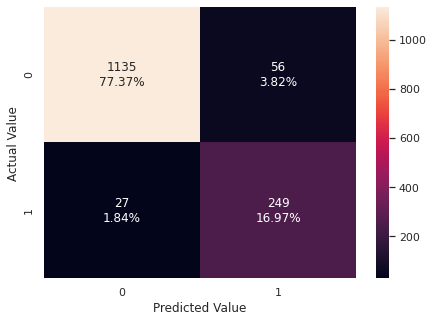

In [220]:
generate_confusion_matrix(y_test, y_pred_test, labels = [0, 1])

## <a id = "link14"></a>Comparison of model performance

In [221]:
compare = pd.concat(models.values())
compare["Model"] = models.keys()
compare.set_index("Model").sort_values(by = 'Recall Test', ascending = False)    # sort the model based on test recall score

,Accuracy Train,Accuracy Test,Recall Train,Recall Test,Precision Train,Precision Test,F1 Train,F1 Test
Model,,,,,,,,
Stacking_Tuned,1.000,0.943,1.000,0.902,1.000,0.816,1.000,0.857
Decision_Tree_Pruned,0.899,0.834,0.972,0.848,0.657,0.538,0.784,0.658
Decision_Tree_Tuned,0.819,0.776,0.924,0.841,0.510,0.449,0.657,0.585
Decision_Tree,1.000,0.905,1.000,0.775,1.000,0.735,1.000,0.755
XGBoost_Tuned,0.999,0.923,1.000,0.768,0.994,0.812,0.997,0.790
Adaboost_Tuned,0.805,0.803,0.748,0.746,0.488,0.485,0.591,0.588
Stacking,0.993,0.928,0.977,0.746,0.986,0.855,0.981,0.797
Random_Forest_Tuned,0.869,0.851,0.781,0.717,0.621,0.586,0.692,0.645
XGBoost,1.000,0.932,0.998,0.703,1.000,0.915,0.999,0.795


- Stacking_Tuned has the highest test recall, which is the metrics we care about. Though slightly overfitting, it has good accuracy and f1 score. It meets our requirement to reduce false negative in prediction.

- Decision_Tree_Pruned and Decision_Tree_Tuned are slgihtly overfitting and performances are quite alike. Decision_Tree_Pruned has the second highest test recall. But test precision and f1 score are not as good as Stacking_Tuned.

- Decision_Tree, XGBoost_Tuned, XGBoost, Stacking, Bagging, Gradient_Boosting_Tuned are quite alike in terms of performance. They are highly overfitting.

- Random_Forest_Tuned, Bagging_Tuned and Adaboost_Tuned generalize well with train and test set. Adaboost_Tuned has the highest recall for test set among the three. 

- Random_Forest, Gradient_Boosting and Adaboost have high test accuracy and precision, but test recall is undesirable.

## <a id = "link15"></a>Conclusion

### 1. Customers who would buy the new travel package have at least one of the following characteristics:
    - Young people.
    - Single.
    - From Tier 2 or Tier 3 cities.
    - Large business owner.
    - With the job title of executive or senior manager.
    - Unstable income. Monthly income below 25000.    
    - With 2 - 4 traveling partners.
    - Prefer higher star rating hotels. 
    - Have passport.
    - Give high PitchSatisfactionScore.
    - Undergo a longer sales pitch and more follow-ups after the sales pitch.

### 2. Customer profile for existing packages

| Customer Profile | Basic | Deluxe | Standard | Super Deluxe | King |
|---|---|---|---|---|---|
| Percent of total customers | 37.68% | 35.43%| 15.18% | 7% | 4.71% |
| Percent of total package buyers | 60% | 22.2% | 13.5% | 2.2% | 2.2% |
| Age | lowest | low | middle  | high | highest |
| Designation | executive | manager | senior manager | AVP | VP |
| Monthly Income | lowest | low | middle  | high | highest |
| Gender | make no difference | males are more likely to buy | males are more likely to buy | males are more likely to buy | females are more likely to buy |
| Marital Status | single more likely to buy | single more likely to buy | make no difference | single more likely to buy | single more likely to buy |
| CityTier | Tier 3 > Tier 2 > Tier 1 | Tier 3 > Tier 1 > Tier 2 | Tier 2 > Tier 3 > Tier 1 | Tier 3 > Tier 1 > Tier 2 | Tier 3 > Tier 1 > Tier 2 |
| Occupation | free lancer/ large business more likely to buy | make no difference | make no difference | salaried more likely to buy | large business more likely to buy | 
| Type of Contact | company invited helps to buy | make no difference | make no difference | company invited helps to buy | self inquiry helps to buy |
| Passport | customers with passport are highly likely to buy | customers with passport are more likely to buy | customers with passport are more likely to buy |  customers with passport are more likely to buy |  customers with passport are more likely to buy |
| Car Ownership| make no difference |  make no difference |  make no difference | car owners incline to buy | car owners incline to buy |
| Preferred hotel star rating | customers preferring 5-star hotels tend to buy | make no difference | make no difference | make no difference | customers preferring 4-star hotels tend to buy | 


- Existing travel packages are targeted to customers with different age, designation, income, occupation and gender.
- Basic is the most popular and affordable product.
- Customers that are large business owners are more likely to buy packages. Though free lancers show high interest to our products, they only account for a negligible proportion of total buyers. Salaried employees and small business owners are the two major sectors, accounting for more than 80% of total buyers.
- Customers pitched with Basic and with passport are far more likely to buy. It may indicate Basic includes international destinations.
- The age range of Super Deluxe buyers is very narrow. It may indicate this product focusses on a specific sector of customers.
- Super Deluxe buyers have fewer traveling partners.
- King buyers take the trip with more children aged less than 5.

### 3. Marketing
- Customers giving score of 3 receive longer pitch. But if the duration of pitch is restricted less than 15.5 mins, it won't impact the score.
- The number of follow-ups doesn't affect sales pitch satisfaction score.

## <a id = "link16"></a> Recommendation
- Singles and males account for more than 50% of total buyers. It's worth researching on their budget/ preferrence to tourism destinations/ expectation on tourism services/ consumer behaviors to provide better experience for them. 
- More than 50% of package buyers prefer 3-star hotels and Half of buyers plan to go with 3 other people. It may offer us advantage to get better discount from our business partners on room booking.
- For Basic and King packages, customers preferring quality hotel property tend to become buyers. We should develop products to take good care of such needs and extend customer base.
- Financial and demographic condition impact a customer's choice. When marketing, we first use the model to predict whether a customer would be a buyer of the new product. If not, recommend the most appropriate substitutions by comparing the customer's profile to that of the existing products.
- Older people are more active in taking trips. But for customers who're greater than 57 years old, those who travel less frequently are more likely to buy travel package. For customers who're less than 40 years old, those who travel more frequently are more likely to buy travel package. Marketing team should target these two sectors to pitch.
- The more follow-ups, the higher chance a customer would buy a package. At the same time, sales pitch satisfaction score won't be hurt. Therefore saleperson should conduct follow-ups actively.
- The longer the duration pitch, the higher chance a customer would buy a package. But we had better restrict it less than 15.5 mins. Otherwise, it may hurt the sales pitch satisfaction score.